# IED Subset

This is the first notebook in the series used to prepare the Irish Emigration Database subset for analysis. The goals of this series are:
<ol>
    <li>To identify the existing data structure;</li>
    <li>To identify how it must be restructured to match the data structure of the Naildoh subset;</li>
    <li>To make the necessary changes;</li>
    <li>Randomly sample cases to add to the NAILDOH subset</li>
 </ol>

## Resources

In [829]:
# Libraries
library(tidyverse) # for data manipulation

In [830]:
# Functions
factorize <- function(df){ # Create a function
  for(i in which(sapply(df, class) == "character")) # that looks for variables with the character class 
      df[[i]] = as.factor(df[[i]]) # and converts them to factor (i.e., categorical) class
  return(df)
}

unfactorize <- function(df){ # Create a function
  for(i in which(sapply(df, class) == "factor")) # that looks for variables with the character class 
      df[[i]] = as.character(df[[i]]) # and converts them to factor (i.e., categorical) class
  return(df)
}

In [831]:
# Data
df <- factorize(read.csv("20230514_AM_ied.csv", header=FALSE, sep=",")) # Put csv into a dataframe called docData

# Variabe Names
colnames(df)
dim(df)
df[0:1,]


[1] "V1" "V2" "V3" "V4" "V5" "V6"

[1] 3055    6

,V1,V2,V3,V4,V5,V6
,<int>,<fct>,<fct>,<fct>,<fct>,<int>
1,300090,04-12-1896,Letters (Emigrants),"Public Record Office, Northern Ireland","Edward Stanley, Katawa, Canada to Joshua Peel, Armagh; PRONI D889/7/1; CMSIED 300090",20481


In [832]:
colnames(df) <- c('idIED', 
                       'ddmmyyyy', 
                       'publisher', 
                       'sourcetitle', 
                       'description', 
                       'docid')
df[0:1,]

,idIED,ddmmyyyy,publisher,sourcetitle,description,docid
,<int>,<fct>,<fct>,<fct>,<fct>,<int>
1,300090,04-12-1896,Letters (Emigrants),"Public Record Office, Northern Ireland","Edward Stanley, Katawa, Canada to Joshua Peel, Armagh; PRONI D889/7/1; CMSIED 300090",20481


In [833]:
# This is a re-do of a previous notebook
# In order to preserve some investigative work, I need to keep the previously assigned docauthorids
# For this reason, I import them here. 
docauthorids <- factorize(read.csv("20240502_PhD_IEDSubset.csv"))
docauthorids <- docauthorids %>% 
select(docid, docauthorid)

Before I do anything else, I am adding the docauthorids, matching on docid, using the left_join method, which will keep all the docids and only assign docauthorids for those observations. An NA will be entered for docauthorid if there is no docauthorid for the docid.

In [834]:
df <- left_join(df,docauthorids, by="docid")
summary(df)

     idIED                 ddmmyyyy                  publisher   
 Min.   :   100002   01-01-1870:  10   Letters (Emigrants):3055  
 1st Qu.:  9007050   01-01-1899:   8                             
 Median :  9410001   01-01-1850:   7                             
 Mean   : 11559149   01-01-1890:   7                             
 3rd Qu.:  9802540   01-01-1880:   5                             
 Max.   :201306101   06-09-1841:   5                             
                     (Other)   :3013                             
                                 sourcetitle  
 Public Record Office, Northern Ireland:2224  
 Ulster-American Folk Park.            : 439  
 Mellon Centre for Migration Studies   : 104  
 B. O'Reilly                           :  79  
 Central Library, Belfast              :  68  
 Linenhall Library                     :  48  
 (Other)                               :  93  
                                                                                                

In [835]:
df %>% 
filter(grepl("Cherry", description))

idIED,ddmmyyyy,publisher,sourcetitle,description,docid,docauthorid
<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>


In [836]:
df <- unfactorize(df)

# 22053 is very brief. Deleted.
# 23950a and 23950b reflect two letters joined together. Original is 23950. Keeping this one and omitting the split ones.
# 29950 is being added to DF (copying 20481 and modifying)
# 37031 is being added to DF (copying 20481 and modifying)

data_x <- df %>% filter(docid == '20481')
data_x$docid <- 37031
data_x$idIED <- 9311009
data_x$ddmmyyyy <- "09-11-1890"
data_x$description <- "John Hall, Pennslyvania to Thomas Black, Chicago.; PRONI D 2041/13; CMSIED 9311009"
data_x$docauthorid <- "IED0500"
df <- bind_rows(df,data_x)

data_x <- df %>% filter(docid == '20481')
data_x$docid <- 29950
data_x$idIED <- 9306005
data_x$ddmmyyyy <- "07-08-1887"
data_x$description <- "John B. Cherry, Spencers Bridge, Canada, to R.R. Cherry.; PRONI D 2166/1/3; CMSIED 9306005"
data_x$docauthorid <- NA
df <- bind_rows(df,data_x)

In [837]:
# Checking to make sure csv matches folder list.

# make list of doc ids in csv
csv <- sort(df$docid)

# make list of doc ids in folder
WD <- getwd()
setwd(WD)
files <- list.files("Archive/CollectionIED")
folder <- sort(sub('.txt', '', files))

print("In CSV but not folder")
setdiff(csv, folder) # In CSV but not folder
print("In folder but not in CSV")
setdiff(folder, csv) # In folder but not CSV

[1] "In CSV but not folder"


numeric(0)

[1] "In folder but not in CSV"


character(0)

In [838]:
main <- read.csv("20240510_PhD_NaildohSubset.csv")
colnames(main) # Get an overview of the dataframe
dim(main)
main[0:1,]

[1] "docauthorid"    "docauthorname"  "docid"          "docyear"       
 [5] "docmonth"       "authorgender"   "agewriting"     "agedeath"      
 [9] "religionNew"    "relMin"         "nationalOrigin" "authorLocation"
[13] "A"              "I"              "CCP"            "UWL"           
[17] "U"              "M"              "S"              "F"             
[21] "L"

[1] 492  21

,docauthorid,docauthorname,docid,docyear,docmonth,authorgender,agewriting,agedeath,religionNew,relMin,⋯,authorLocation,A,I,CCP,UWL,U,M,S,F,L
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>,<lgl>,⋯,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,per0001043,"Segale, Sister Blandina, 1850-1941",S1019-D002,1872,11,F,22,91,Catholic,TRUE,⋯,USA,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE


First to main df, add "publisher" (NAILDOH).

Then for df, keep docid as it is, and make the following adjustments:

<ul>
    <li>docauthorid (create from docauthorname)</li>
    <li>docauthorname (description)</li>
    <li>docyear (mm-dd-yyyy)</li>
    <li>docmonth (mm-dd-yyyy)</li>
   <li>authorgender (NA)</li>
    <li>agewriting (NA)</li>
    <li>agedeath (NA)</li>
    <li>relMin (NA)</li>
    <li>nationalOrigin ("Ireland")</li>
    <li>authorLocation (description)</li>
    <li>U (NA)</li>
    <li>M (NA)</li>
    <li>S (NA)</li>
    <li>F (NA)</li>
    <li>L (NA)</li>
 </ul>
  


In [839]:
# Change to main:
main$publisher <- "NAILDOH"
main

docauthorid,docauthorname,docid,docyear,docmonth,authorgender,agewriting,agedeath,religionNew,relMin,⋯,A,I,CCP,UWL,U,M,S,F,L,publisher
<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>,<lgl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>
per0001043,"Segale, Sister Blandina, 1850-1941",S1019-D002,1872,11,F,22,91,Catholic,TRUE,⋯,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,NAILDOH
per0001043,"Segale, Sister Blandina, 1850-1941",S1019-D004,1872,12,F,22,91,Catholic,TRUE,⋯,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,NAILDOH
per0001043,"Segale, Sister Blandina, 1850-1941",S1019-D005,1872,12,F,22,91,Catholic,TRUE,⋯,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,NAILDOH
per0001043,"Segale, Sister Blandina, 1850-1941",S1019-D006,1872,12,F,22,91,Catholic,TRUE,⋯,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,NAILDOH
per0001043,"Segale, Sister Blandina, 1850-1941",S1019-D007,1873,3,F,23,91,Catholic,TRUE,⋯,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,NAILDOH
per0001043,"Segale, Sister Blandina, 1850-1941",S1019-D008,1873,7,F,23,91,Catholic,TRUE,⋯,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,NAILDOH
per0001043,"Segale, Sister Blandina, 1850-1941",S1019-D009,1873,9,F,23,91,Catholic,TRUE,⋯,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,NAILDOH
per0001043,"Segale, Sister Blandina, 1850-1941",S1019-D010,1874,6,F,24,91,Catholic,TRUE,⋯,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,NAILDOH
per0001043,"Segale, Sister Blandina, 1850-1941",S1019-D011,1874,11,F,24,91,Catholic,TRUE,⋯,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,NAILDOH


## Changes

In [840]:
# First the easy changes to df
df$publisher <- "IED"
df$nationalOrigin <- "Irish"
df

idIED,ddmmyyyy,publisher,sourcetitle,description,docid,docauthorid,nationalOrigin
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
300090,04-12-1896,IED,"Public Record Office, Northern Ireland","Edward Stanley, Katawa, Canada to Joshua Peel, Armagh; PRONI D889/7/1; CMSIED 300090",20481,IED0196,Irish
9501251,12-01-1891,IED,"Public Record Office, Northern Ireland","From, Brooklyn, N.Y., to ""Dear James"" [no address]; PRONI T 3033/10; CMSIED 9501251",20487,IED0089,Irish
300018,01-06-1822,IED,Ulster-American Folk Park.,"James Kelly, Desertmartin to John Kelly, Pennsylvania;The Kelly Family Documents: Copyright Retained by The UlsterAmerican Folk Park.; CMSIED 300018",20514,NA,Irish
9408355,01-10-1842,IED,"Public Record Office, Northern Ireland","Alexander McCloy, Pennsylvania, to Cousin, [Ireland? or Liverpool, England?]; PRONI D1444/18; CMSIED 9408355",20519,IED0048,Irish
9003061,10-01-1896,IED,"Public Record Office, Northern Ireland","George Kirkpatrick, Toronto, to Rev. Alex. Kirkpatrick, Co Antrim; PRONI D 1424/11; CMSIED 9003061",20522,IED0253,Irish
9011027,13-02-1873,IED,"Public Record Office, Northern Ireland","William Porter, U.S.A. to Robert Porter, Ireland; PRONI D 1152/3/25; CMSIED 9011027",20529,IED1028,Irish
9905110,16-05-1891,IED,Ulster-American Folk Park.,"G.R. Wood, Holly, Michigan to Annie Weir, Michigan;Copyright Retained by Mrs. Linda Weir; CMSIED 9905110",20530,IED0239,Irish
9006021,01-01-1862,IED,"Public Record Office, Northern Ireland","Alexander Robb, Near Panama, to Family [Dundonald, Co Down?]; PRONI T 1454/6/2; CMSIED 9006021",20538,NA,Irish
9411034,15-02-1858,IED,"Public Record Office, Northern Ireland","N. Carrothers, Ontario to W.Carrothers, Farnaght, Fermanagh; PRONI T3734; CMSIED 9411034",20563,IED0728,Irish


In [841]:
vars <- c("authorgender", "agewriting", "agedeath", "relMin", "U", "M", "S", "F", "L")
df[vars] <- NA
df

idIED,ddmmyyyy,publisher,sourcetitle,description,docid,docauthorid,nationalOrigin,authorgender,agewriting,agedeath,relMin,U,M,S,F,L
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
300090,04-12-1896,IED,"Public Record Office, Northern Ireland","Edward Stanley, Katawa, Canada to Joshua Peel, Armagh; PRONI D889/7/1; CMSIED 300090",20481,IED0196,Irish,NA,NA,NA,NA,NA,NA,NA,NA,NA
9501251,12-01-1891,IED,"Public Record Office, Northern Ireland","From, Brooklyn, N.Y., to ""Dear James"" [no address]; PRONI T 3033/10; CMSIED 9501251",20487,IED0089,Irish,NA,NA,NA,NA,NA,NA,NA,NA,NA
300018,01-06-1822,IED,Ulster-American Folk Park.,"James Kelly, Desertmartin to John Kelly, Pennsylvania;The Kelly Family Documents: Copyright Retained by The UlsterAmerican Folk Park.; CMSIED 300018",20514,NA,Irish,NA,NA,NA,NA,NA,NA,NA,NA,NA
9408355,01-10-1842,IED,"Public Record Office, Northern Ireland","Alexander McCloy, Pennsylvania, to Cousin, [Ireland? or Liverpool, England?]; PRONI D1444/18; CMSIED 9408355",20519,IED0048,Irish,NA,NA,NA,NA,NA,NA,NA,NA,NA
9003061,10-01-1896,IED,"Public Record Office, Northern Ireland","George Kirkpatrick, Toronto, to Rev. Alex. Kirkpatrick, Co Antrim; PRONI D 1424/11; CMSIED 9003061",20522,IED0253,Irish,NA,NA,NA,NA,NA,NA,NA,NA,NA
9011027,13-02-1873,IED,"Public Record Office, Northern Ireland","William Porter, U.S.A. to Robert Porter, Ireland; PRONI D 1152/3/25; CMSIED 9011027",20529,IED1028,Irish,NA,NA,NA,NA,NA,NA,NA,NA,NA
9905110,16-05-1891,IED,Ulster-American Folk Park.,"G.R. Wood, Holly, Michigan to Annie Weir, Michigan;Copyright Retained by Mrs. Linda Weir; CMSIED 9905110",20530,IED0239,Irish,NA,NA,NA,NA,NA,NA,NA,NA,NA
9006021,01-01-1862,IED,"Public Record Office, Northern Ireland","Alexander Robb, Near Panama, to Family [Dundonald, Co Down?]; PRONI T 1454/6/2; CMSIED 9006021",20538,NA,Irish,NA,NA,NA,NA,NA,NA,NA,NA,NA
9411034,15-02-1858,IED,"Public Record Office, Northern Ireland","N. Carrothers, Ontario to W.Carrothers, Farnaght, Fermanagh; PRONI T3734; CMSIED 9411034",20563,IED0728,Irish,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [842]:
# Now the tougher ones. First break out date into month, year and day.
df$ddmmyyyy <- as.character(df$ddmmyyyy)
str(df$ddmmyyyy)

 chr [1:3057] "04-12-1896" "12-01-1891" "01-06-1822" "01-10-1842" ...


In [843]:
# Now new ones based on old ones
# Dates
df$docmonth <- as.factor(str_sub(df$ddmmyyyy, 4, 5))
df$docyear <- as.numeric(str_sub(df$ddmmyyyy, -4,-1))
vars <- c("docmonth", "docyear")
df[vars] %>% 
summary()

    docmonth       docyear    
 01     : 376   Min.   :1750  
 12     : 291   1st Qu.:1844  
 11     : 277   Median :1865  
 06     : 262   Mean   :1860  
 09     : 250   3rd Qu.:1888  
 03     : 243   Max.   :1913  
 (Other):1358                 

In [844]:
#Names
unique(df$description)[0:50]

[1] "Edward Stanley, Katawa, Canada to Joshua Peel, Armagh; PRONI D889/7/1; CMSIED 300090"                                                                
 [2] "From, Brooklyn, N.Y., to \"Dear James\" [no address]; PRONI T 3033/10; CMSIED 9501251"                                                               
 [3] "James Kelly, Desertmartin to John Kelly, Pennsylvania;The Kelly Family Documents: Copyright Retained by The UlsterAmerican Folk Park.; CMSIED 300018"
 [4] "Alexander McCloy, Pennsylvania, to Cousin, [Ireland? or Liverpool, England?]; PRONI D1444/18; CMSIED 9408355"                                        
 [5] "George Kirkpatrick, Toronto, to Rev. Alex. Kirkpatrick, Co Antrim; PRONI D 1424/11; CMSIED 9003061"                                                  
 [6] "William Porter, U.S.A. to Robert Porter, Ireland; PRONI D 1152/3/25; CMSIED 9011027"                                                                 
 [7] "G.R. Wood, Holly, Michigan to Annie Weir, Michigan;Copyright Retained by Mrs. Linda Weir; CMSIED 9905110"                                            
 [8] "Alexander Robb, Near Panama, to Family [Dundonald, Co Down?]; PRONI T 1454/6/2; CMSIED 9006021"                                                      
 [9] "N. Carrothers, Ontario to W.Carrothers, Farnaght, Fermanagh; PRONI T3734; CMSIED 9411034"                                                            
[10] "James P. Breeze, Concord, to Charley Breeze.; PRONI T 1381/9; CMSIED 8906036"                                                                        
[11] "Elisha & Lois Parish, U.S.A. to Moses Johnston, New York.; PRONI T 3758/8; CMSIED 9808492"                                                           
[12] "Robert McClorg [Philadelphia?] to Parents, Co Londonderry.; PRONI T.1227/33; CMSIED 8905199"                                                         
[13] "O Bouligny, [New Orleans?] To [Mrs A. W. Smyth?] [Massachusetts?].;Brendan O'Reilly.; CMSIED 9902174"                                                
[14] "[?], Kingston, Canada, to George [Kirkpatrick, Co Antrim?]; PRONI D 1424/11; CMSIED 9004027"                                                         
[15] "Martha Wilson, Ontario, to her Brother, George Reid, Armagh.; PRONI D3014/3/2; CMSIED 9502061"                                                       
[16] "James Heather, Montreal, Canada, to Thomas Greeves, Dungannon.; PRONI D 593/5; CMSIED 9504036"                                                       
[17] "Richard Rothwell, Jeffersonville, to rosa Rothwell, Ireland, Mar. 1866; PRONI T2621/3/10; CMSIED 9309131"                                            
[18] "Kate Brown, Canada, to her Aunt Catherine Kirkpatrick, Co Antrim; PRONI D1604/270; CMSIED 9407001"                                                   
[19] "A. Jackson, Southfield, To Annie Weir, [?];Copyright Retained By Mrs Linda Weir; CMSIED 9906113"                                                     
[20] "Mary Dwyer, Independence, Iowa, to \"Rev. Father\", Co. Armagh.; PRONI D889/7/1; CMSIED 1200298"                                                     
[21] "Edward McNally, USA  to William McNally, Portaferry.; PRONI T 1448; CMSIED 9002017"                                                                  
[22] "E. Megaw, [?], to [Annie Weir?] [?];Copyright Retained By Mrs Linda Weir; CMSIED 9906120"                                                            
[23] "James Horner, Philadelphia to Jacob McCracken, Co. Derry.; PRONI T 1592/10; CMSIED 8901021"                                                          
[24] "Samuel Shaw, Chicago, Illinois, U.S.A., to His Mother, [Co. Down?]; PRONI D2709/1/4; CMSIED 9501040"                                                 
[25] "William Smith, Philadelphia to James Smyth, Co. Antrim; PRONI D 1828/4; CMSIED 2006172"                                                              
[26] "James Ormond, New York, informant to Viscount Canterbury, Mildenhall; PRONI T3069/; CMSIED 9410

For this variable, I am concerned with the sender names, not the locations or recipients, so I am going to drop everything after the first comma.

In [845]:
df$docauthorname <- gsub(",.*\\b", "", df$description)
unique(df$docauthorname)[0:50]

[1] "Edward Stanley"                                                                       
 [2] "From"                                                                                 
 [3] "James Kelly"                                                                          
 [4] "Alexander McCloy"                                                                     
 [5] "George Kirkpatrick"                                                                   
 [6] "William Porter"                                                                       
 [7] "G.R. Wood"                                                                            
 [8] "Alexander Robb"                                                                       
 [9] "N. Carrothers"                                                                        
[10] "James P. Breeze"                                                                      
[11] "Elisha & Lois Parish"                                                                 
[12] "Robert McClorg [Philadelphia?] to Parents"                                            
[13] "O Bouligny"                                                                           
[14] "[?]"                                                                                  
[15] "Martha Wilson"                                                                        
[16] "James Heather"                                                                        
[17] "Richard Rothwell"                                                                     
[18] "Kate Brown"                                                                           
[19] "A. Jackson"                                                                           
[20] "Mary Dwyer"                                                                           
[21] "Edward McNally"                                                                       
[22] "E. Megaw"                                                                             
[23] "James Horner"                                                                         
[24] "Samuel Shaw"                                                                          
[25] "William Smith"                                                                        
[26] "James Ormond"                                                                         
[27] "A. Aitken"                                                                            
[28] "Jim Swan"                                                                             
[29] "Philip Formby"                                                                        
[30] "Samuel James McCreery"                                                                
[31] "William W Shaw"                                                                       
[32] "Wm. Heather"                                                                          
[33] "William Parke"                                                                        
[34] "Alex McLeod"                                                                          
[35] "Isabella Weir"                                                                        
[36] "Leydd McCrory [?]"                                                                    
[37] "William W. Shaw"                                                                      
[38] "John Parks to John Caldwell Junior; PRONI T 3541/2/2; CMSIED 9309353"                 
[39] "I. Pemberton"                                                                         
[40] "William Montgomery"                                                                   
[41] "[?] Sample"                                                                           
[42] "Hamilton Young"                                                                       
[43] "James and Margaret Carson"                                                            
[4

Now I am dropping everything after "to" in those cases where it appears.

In [846]:
df$docauthorname <- gsub(".to.*","", df$docauthorname)
unique(df$docauthorname)[0:50]

[1] "Edward Stanley"                                                                       
 [2] "From"                                                                                 
 [3] "James Kelly"                                                                          
 [4] "Alexander McCloy"                                                                     
 [5] "George Kirkpatrick"                                                                   
 [6] "William Porter"                                                                       
 [7] "G.R. Wood"                                                                            
 [8] "Alexander Robb"                                                                       
 [9] "N. Carrothers"                                                                        
[10] "James P. Breeze"                                                                      
[11] "Elisha & Lois Parish"                                                                 
[12] "Robert McClorg [Philadelphia?]"                                                       
[13] "O Bouligny"                                                                           
[14] "[?]"                                                                                  
[15] "Martha Wilson"                                                                        
[16] "James Heather"                                                                        
[17] "Richard Rothwell"                                                                     
[18] "Kate Brown"                                                                           
[19] "A. Jackson"                                                                           
[20] "Mary Dwyer"                                                                           
[21] "Edward McNally"                                                                       
[22] "E. Megaw"                                                                             
[23] "James Horner"                                                                         
[24] "Samuel Shaw"                                                                          
[25] "William Smith"                                                                        
[26] "James Ormond"                                                                         
[27] "A. Aitken"                                                                            
[28] "Jim Swan"                                                                             
[29] "Philip Formby"                                                                        
[30] "Samuel James McCreery"                                                                
[31] "William W Shaw"                                                                       
[32] "Wm. Heather"                                                                          
[33] "William Parke"                                                                        
[34] "Alex McLeod"                                                                          
[35] "Isabella Weir"                                                                        
[36] "Leydd McCrory [?]"                                                                    
[37] "William W. Shaw"                                                                      
[38] "John Parks"                                                                           
[39] "I. Pembe"                                                                             
[40] "William Montgomery"                                                                   
[41] "[?] Sample"                                                                           
[42] "Hami"                                                                                 
[43] "James and Margaret Carson"                                                            
[4

In [847]:
# Cleaning up a few more problems.
df$docauthorname <- gsub("From", "", df$docauthorname)# From
df$docauthorname <- gsub("\\[.*\\]","", df$docauthorname) #Brackets and contents thereof
df$docauthorname <- gsub("\\;.*","", df$docauthorname) #Everything after semi-colon
df$docauthorname <- gsub(".for.*","", df$docauthorname) #Everything after "for"
unique(df$docauthorname)[0:50]

[1] "Edward Stanley"                     ""                                  
 [3] "James Kelly"                        "Alexander McCloy"                  
 [5] "George Kirkpatrick"                 "William Porter"                    
 [7] "G.R. Wood"                          "Alexander Robb"                    
 [9] "N. Carrothers"                      "James P. Breeze"                   
[11] "Elisha & Lois Parish"               "Robert McClorg "                   
[13] "O Bouligny"                         "Martha Wilson"                     
[15] "James Heather"                      "Richard Rothwell"                  
[17] "Kate Brown"                         "A. Jackson"                        
[19] "Mary Dwyer"                         "Edward McNally"                    
[21] "E. Megaw"                           "James Horner"                      
[23] "Samuel Shaw"                        "William Smith"                     
[25] "James Ormond"                       "A. Aitken"                         
[27] "Jim Swan"                           "Philip Formby"                     
[29] "Samuel James McCreery"              "William W Shaw"                    
[31] "Wm. Heather"                        "William Parke"                     
[33] "Alex McLeod"                        "Isabella Weir"                     
[35] "Leydd McCrory "                     "William W. Shaw"                   
[37] "John Parks"                         "I. Pembe"                          
[39] "William Montgomery"                 " Sample"                           
[41] "Hami"                               "James and Margaret Carson"         
[43] "Thomas Armstrong"                   "Solomon Moody"                     
[45] "Reference written by James Barbour" "Andrew Gibson"                     
[47] "E. Rothwell"                        "John McBride"                      
[49] "George Doyle"                       "E. Cochrane"

References letters are ok but we don't need this in the author variable.

In [848]:
df$docauthorname <- gsub("Reference written by ","", df$docauthorname)
unique(df$docauthorname)[0:50]

[1] "Edward Stanley"            ""                         
 [3] "James Kelly"               "Alexander McCloy"         
 [5] "George Kirkpatrick"        "William Porter"           
 [7] "G.R. Wood"                 "Alexander Robb"           
 [9] "N. Carrothers"             "James P. Breeze"          
[11] "Elisha & Lois Parish"      "Robert McClorg "          
[13] "O Bouligny"                "Martha Wilson"            
[15] "James Heather"             "Richard Rothwell"         
[17] "Kate Brown"                "A. Jackson"               
[19] "Mary Dwyer"                "Edward McNally"           
[21] "E. Megaw"                  "James Horner"             
[23] "Samuel Shaw"               "William Smith"            
[25] "James Ormond"              "A. Aitken"                
[27] "Jim Swan"                  "Philip Formby"            
[29] "Samuel James McCreery"     "William W Shaw"           
[31] "Wm. Heather"               "William Parke"            
[33] "Alex McLeod"               "Isabella Weir"            
[35] "Leydd McCrory "            "William W. Shaw"          
[37] "John Parks"                "I. Pembe"                 
[39] "William Montgomery"        " Sample"                  
[41] "Hami"                      "James and Margaret Carson"
[43] "Thomas Armstrong"          "Solomon Moody"            
[45] "James Barbour"             "Andrew Gibson"            
[47] "E. Rothwell"               "John McBride"             
[49] "George Doyle"              "E. Cochrane"

Now, what is this sample?

In [849]:
df %>% 
filter(docauthorname==" Sample") %>% 
select(docid)

docid
<dbl>
20976


In [850]:
getwd()

[1] "/Users/alaynemoody/Dropbox/GradStudies/Flinders/Dissertation"

In [851]:
read_file(paste0("/Users/alaynemoody/Dropbox/GradStudies/Flinders/Dissertation/Archive/CollectionIED/", "20976.txt"))

[1] "                137 North Elliott Place\n                Brooklyn N. [New?] York\n                                  U.S.A\n                         April 5th 1897\n\nMrs Ellen McIntire [McIntyre?]\n                My dear sister\n                            Your\nkind letter gave us sincere\ncomfort. I know that James\nwas very negligent about\nwriting to you. I often asked\nhim why he did not write to\nhis sisters and all he would\nsay was \"I dont know\". I believe\nthat he felt discouraged\nand chagrined at his failure\nof success in his business life\nand did not like to own it\nto his relatives. You say that\nyou heard the boys took\nadvantage of their Father He\nalways blamed them a great\ndeal perhaps too much but\nthey were never any great\nhelp to him and When\nbusiness was very dull and\ntimes hard and his health\nvery poor they left him to\nstruggle on alone and he\nhad to give up. I only\nblame one of them (Joseph)\nand I am having hard\ntrouble with him now to\nget some money he was\nowing his father. Samuel was\na great trial as he was given\nto drink. He died three years\nago. \"James Lalta\" has two children\nand lives in another county\nabout two hours travel\nJoseph is married, no children\nin dry goods business here\nin Brooklyn.\n\"Charles Walker\" is married one\nchild - dry goods - here in\nBrooklyn. All friendly\nexcept Joseph and he\nis not friendly with his brothers\n#PAGE 2\n   And now you will think\nthat I have been unmindful\nof you [your?] request to have one\narticle written. I have been\ndoing my best but it has\nbeen slow work. In the first\nplace I scarcely knew who\nto ask to write it as we\nhave had several different\n pastors in the last 12 years\nand all but the last one\nare gone from Brooklyn\nand I did\nnot care to have him write\nit because he did not know\nhim well enough personally\nso I decided to ask Mr\nWoodside and sent him\nyour note. At the time he\nwas very busy with preperations [preparations?]\nfor his anniversary and it was\nabout three weeks before I\nreceived an answer asking\nfor some items of information\nFinally he wrote that he\nhad written an article for\nthe Sentinel March number\nI send you his letter in\nexplanation for so doing. I\nalso send you a copy of the\nSentinel containing the obituary\nI am afraid it is not what\nyou desire but I cannot do\nany better now. I have been\nvery much afflicted all winter\nwith rheumatism in my right\nknee. Helen (we call her \"Nellie\") hurt\nher foot in Jany and\ndid not step on it for two months\nKatherine, the youngest, expects to\nbe married in June and they\nwill board with me I hope we\nmay hear often and know more\nof each other even on earth and\nnot fail to meet with the\ndear ones gone before in our\nEternal home in the heavenly\nLands. The girls join in love\n                  Your sister\n#PAGE 3\n                        [?] [Sample?]\nJames suffered\nmuch pain for\nthree months but\nwas in bed only\ntwo weeks and\nwas kept under\nthe influence of\nmorphine to keep\ndown convulsions\nbut he knew us\nall until very\nnear the last."

Sample is not a name. This letter does not seem to include one, therefore omitting it, to be converted to blank and then anonymous.

In [852]:
df$docauthorname <- gsub(" Sample","", df$docauthorname) 
unique(df$docauthorname)[0:50]

[1] "Edward Stanley"            ""                         
 [3] "James Kelly"               "Alexander McCloy"         
 [5] "George Kirkpatrick"        "William Porter"           
 [7] "G.R. Wood"                 "Alexander Robb"           
 [9] "N. Carrothers"             "James P. Breeze"          
[11] "Elisha & Lois Parish"      "Robert McClorg "          
[13] "O Bouligny"                "Martha Wilson"            
[15] "James Heather"             "Richard Rothwell"         
[17] "Kate Brown"                "A. Jackson"               
[19] "Mary Dwyer"                "Edward McNally"           
[21] "E. Megaw"                  "James Horner"             
[23] "Samuel Shaw"               "William Smith"            
[25] "James Ormond"              "A. Aitken"                
[27] "Jim Swan"                  "Philip Formby"            
[29] "Samuel James McCreery"     "William W Shaw"           
[31] "Wm. Heather"               "William Parke"            
[33] "Alex McLeod"               "Isabella Weir"            
[35] "Leydd McCrory "            "William W. Shaw"          
[37] "John Parks"                "I. Pembe"                 
[39] "William Montgomery"        "Hami"                     
[41] "James and Margaret Carson" "Thomas Armstrong"         
[43] "Solomon Moody"             "James Barbour"            
[45] "Andrew Gibson"             "E. Rothwell"              
[47] "John McBride"              "George Doyle"             
[49] "E. Cochrane"               "George R. Wood"

In [853]:
df$docauthorname[df$docauthorname==""] <- "Anonymous"
unique(df$docauthorname)[0:50]

[1] "Edward Stanley"            "Anonymous"                
 [3] "James Kelly"               "Alexander McCloy"         
 [5] "George Kirkpatrick"        "William Porter"           
 [7] "G.R. Wood"                 "Alexander Robb"           
 [9] "N. Carrothers"             "James P. Breeze"          
[11] "Elisha & Lois Parish"      "Robert McClorg "          
[13] "O Bouligny"                "Martha Wilson"            
[15] "James Heather"             "Richard Rothwell"         
[17] "Kate Brown"                "A. Jackson"               
[19] "Mary Dwyer"                "Edward McNally"           
[21] "E. Megaw"                  "James Horner"             
[23] "Samuel Shaw"               "William Smith"            
[25] "James Ormond"              "A. Aitken"                
[27] "Jim Swan"                  "Philip Formby"            
[29] "Samuel James McCreery"     "William W Shaw"           
[31] "Wm. Heather"               "William Parke"            
[33] "Alex McLeod"               "Isabella Weir"            
[35] "Leydd McCrory "            "William W. Shaw"          
[37] "John Parks"                "I. Pembe"                 
[39] "William Montgomery"        "Hami"                     
[41] "James and Margaret Carson" "Thomas Armstrong"         
[43] "Solomon Moody"             "James Barbour"            
[45] "Andrew Gibson"             "E. Rothwell"              
[47] "John McBride"              "George Doyle"             
[49] "E. Cochrane"               "George R. Wood"

In [854]:
# Omit letter from/by
df$docauthorname <- gsub(".*letter from ","", df$docauthorname)
df$docauthorname <- gsub(".*Letter from ","", df$docauthorname)
df$docauthorname <- gsub(".*letter by ","", df$docauthorname)
df$docauthorname <- gsub(".*Letter by ","", df$docauthorname)
unique(df$docauthorname)[0:50]

[1] "Edward Stanley"            "Anonymous"                
 [3] "James Kelly"               "Alexander McCloy"         
 [5] "George Kirkpatrick"        "William Porter"           
 [7] "G.R. Wood"                 "Alexander Robb"           
 [9] "N. Carrothers"             "James P. Breeze"          
[11] "Elisha & Lois Parish"      "Robert McClorg "          
[13] "O Bouligny"                "Martha Wilson"            
[15] "James Heather"             "Richard Rothwell"         
[17] "Kate Brown"                "A. Jackson"               
[19] "Mary Dwyer"                "Edward McNally"           
[21] "E. Megaw"                  "James Horner"             
[23] "Samuel Shaw"               "William Smith"            
[25] "James Ormond"              "A. Aitken"                
[27] "Jim Swan"                  "Philip Formby"            
[29] "Samuel James McCreery"     "William W Shaw"           
[31] "Wm. Heather"               "William Parke"            
[33] "Alex McLeod"               "Isabella Weir"            
[35] "Leydd McCrory "            "William W. Shaw"          
[37] "John Parks"                "I. Pembe"                 
[39] "William Montgomery"        "Hami"                     
[41] "James and Margaret Carson" "Thomas Armstrong"         
[43] "Solomon Moody"             "James Barbour"            
[45] "Andrew Gibson"             "E. Rothwell"              
[47] "John McBride"              "George Doyle"             
[49] "E. Cochrane"               "George R. Wood"

In [855]:
toMatch <- c("\\[|\\]", "\\(|\\)")
unique (grep(paste(toMatch,collapse="|"), 
                        df$docauthorname, value=TRUE))

[1] "H.Y. [Hami"                "Agnes Shakespeare (Nesta)"
 [3] "B. F. Butler [Washin"      "[William McElderry"       
 [5] "[Hami"                     " [Michigan"               
 [7] "John Mortan [Mo"           "[Sandy Robb"              
 [9] "Martha [Pozi"              "Andrew [John"             
[11] "[Geoffrey Blakely"

In [856]:
# Code for testing method bypassed
#x <- "H.Y. [Hami"
df$docauthorname <- gsub(".*\\[.*","", df$docauthorname) #Brackets and contents thereof
#gsub("\\[|\\]", "", x) #Just the brackets
#x #Original

#y <- "Agnes Shakespeare (Nesta)"
df$docauthorname <- gsub("\\(.*\\)","", df$docauthorname) #Parantheses and contents thereof
#gsub("\\(|\\)", "", y) #Just the parantheses
#y #Original

unique(grep(paste(toMatch,collapse="|"), df$docauthorname, value=TRUE))

character(0)

In [857]:
df$docauthorname[df$docauthorname==""] <- "Anonymous"
unique(df$docauthorname)[0:50]

[1] "Edward Stanley"            "Anonymous"                
 [3] "James Kelly"               "Alexander McCloy"         
 [5] "George Kirkpatrick"        "William Porter"           
 [7] "G.R. Wood"                 "Alexander Robb"           
 [9] "N. Carrothers"             "James P. Breeze"          
[11] "Elisha & Lois Parish"      "Robert McClorg "          
[13] "O Bouligny"                "Martha Wilson"            
[15] "James Heather"             "Richard Rothwell"         
[17] "Kate Brown"                "A. Jackson"               
[19] "Mary Dwyer"                "Edward McNally"           
[21] "E. Megaw"                  "James Horner"             
[23] "Samuel Shaw"               "William Smith"            
[25] "James Ormond"              "A. Aitken"                
[27] "Jim Swan"                  "Philip Formby"            
[29] "Samuel James McCreery"     "William W Shaw"           
[31] "Wm. Heather"               "William Parke"            
[33] "Alex McLeod"               "Isabella Weir"            
[35] "Leydd McCrory "            "William W. Shaw"          
[37] "John Parks"                "I. Pembe"                 
[39] "William Montgomery"        "Hami"                     
[41] "James and Margaret Carson" "Thomas Armstrong"         
[43] "Solomon Moody"             "James Barbour"            
[45] "Andrew Gibson"             "E. Rothwell"              
[47] "John McBride"              "George Doyle"             
[49] "E. Cochrane"               "George R. Wood"

In [858]:
df %>% 
filter(docauthorname=="Incomplete:  ") %>% 
select(docid)

docid
<dbl>
38606


In [859]:
read_file(paste0("/Users/alaynemoody/Dropbox/GradStudies/Flinders/Dissertation/Archive/CollectionIED/", "38606.txt"))

[1] "                             Stockton Sept 24th\r\n                                         1800\r\n\r\nDear Sister\r\n\r\nI recieved [received?] yours Saturday\r\nwith one From Home.  I am Still anxious\r\nabout Mother as it says she is not Yet\r\nfully recovered yet  I was surprised to\r\n[hear?] that Mr Kimball had [mentioned?]\r\nme I have never met him nor do not care\r\nto I am now In The Yard as [Attendant?]\r\n[There?] but expect a permenant [permanent?]\r\nposition of night watching as soon as a\r\nvancancy ocurs [occurs?] I have succeded\r\n[succeeded?] beyond my expectations I\r\ndid have only Temporary Nightwatching\r\nbut did not think it necessary to Say\r\nanything to that effect everybody Seems\r\nkind to me and I endeavour to do my\r\nduty to my Fellow creatures as far as [In?]\r\n[me?] lays Hall 12 was well Furnished when I\r\nleft Miss Gaddam merely wants to make a\r\ndisplay I myself Heard her criticize Miss\r\nHapleh for Being extravagant on 15 then\r\nshe turns round and does The Same how is\r\nLizzie Proctor and How do you like Dr [Sahsbury?]\r\n[Salisbury?] by the way does he ever ask for\r\nme I want you to take particular pains and\r\ntell Them that I do not do any kind of work\r\nand get done.  The pay almost The yet I tell\r\nyou I do not regret my journey have a Beautiful\r\nroom all to myself everything is so regulated and\r\nSo quiet The beds I told you of are [straw?]\r\nbeds The muff & Belt & neck strap is used very\r\nFreely I in turn warn you what to do in respect\r\nto what I send you be careful about what you say\r\nand who you repeat it too I Just wish you were\r\nHere but I will See a chance Sometime meanwhile\r\nyou be on The lookout....\r\n\r\n"

In [860]:
df %>%
filter(docauthorname=="Incomplete: ") %>% 
select(docid, description)

docid,description
<dbl>,<chr>
24149,"Incomplete: [?], Michigan To Annie Weir, [?];Copyright Retained by Mrs Linda Weir; CMSIED 9906061"
32432,"Incomplete: [W.J. Weir?], Fresno, to ""My Dear Annie"";Copyright Retained by Mrs Linda Weir; CMSIED 9906160"
32652,"Incomplete: [?], Edenclaw, Co. Fermanagh to ""Dear Sister"";Copyright Retained by Mrs Linda Weir; CMSIED 9906177"
35929,"Incomplete: [Bella Weir?] to ""Dear Mother, Sisters Bros"";Copyright Retained by Mrs Linda Weir; CMSIED 9906155"
37323,"Incomplete: [W. Weir?], Fresno, to ""Dear Annie"";Copyright Retained by Mrs Linda Weir; CMSIED 9906165"
40815,"Incomplete: [W.J. Weir?], Fresno, to ""Dear Annie"";Copyright Retained by Mrs Linda Weir; CMSIED 9906169"
40882,"Incomplete: [?], Michigan to Annie Weir, Pontiac;Copyright Retained by Mrs Linda Weir; CMSIED 9906170"
44825,"Incomplete: [?] [New Brunswick?], to ""My very dear Sister"",; PRONI D 1792/; CMSIED 9909292"
51927,"Incomplete: [W.J. Weir?], Fresno, to ""My Dear Annie"";Copyright Retained by Mrs Linda Weir; CMSIED 9906167"


In [861]:
docids <- c("32432", "40815", "51927")
df$docauthorname[df$docid %in% docids] <- "W.J. Weir"

docids <- c("35929")
df$docauthorname[df$docid %in% docids] <- "Isabella Weir"

docids <- c("37323")
df$docauthorname[df$docid %in% docids] <- "W. Weir"

docids <- c("24149", "32652", "40882", "44825")
df$docauthorname[df$docid %in% docids] <- "Anonymous"

df %>%
filter(docauthorname=="Incomplete: ") %>% 
select(docid, description)

docid,description
<dbl>,<chr>


In [862]:
df %>% 
filter(docauthorname=="Philadelphia.") %>% 
select(docid, description)

docid,description
<dbl>,<chr>
35118,Extract of a Letter from Philadelphia.;The Belfast Mercury or Freeman's Chronicle 30th Sept 1783.; CMSIED 9407168
35820,"Extract of a Letter from Philadelphia.;The Northern Star, July 6th to July 9th 1795.; CMSIED 9408215"
41043,"Extract of a Letter from Philadelphia.;The Belfast Mercury, 27th April 1784.; CMSIED 9407189"
43633,Extract of a Letter from Philadelphia.;The Belfast Mercury 28th November 1783.; CMSIED 9407176


These are all published letters, which is ok in principal. But let's check out the content.

In [863]:
read_file(paste0("/Users/alaynemoody/Dropbox/GradStudies/Flinders/Dissertation/Archive/CollectionIED/", "43633.txt"))

[1] "Extract of a letter from Philadelphia, to a merchant\nin Belfast, Sept. 24 1783.\n\"I have not experienced much civilities or attention\nfrom any of my introductory letters here\nthis however you must not think singular as I am\nnot alone in this remark, it is the treatment almost\nevery Irishman has received. Hospitality and friendship,\nthe former characteristic of America,\nhas fled the land. The merchants are jealous\nof evory [every?] person that comes here who has the\nappearance of setting among them, and it is incredible\nhow reserved they are in conversation,\nand with what duplicity they guard themselves\non any matter of trade. I despise them for attempting\nto discharge their army without paying\nthem three years arrears now due, or making\nany provisions for those disabled in service. The\nsoldiers took the alarm and rose to pay themselves,\nbut where [were?] quelled by fair promises, which\nperhaps may be their only reward at last, in\nshort the wealthy part of the people are a selfish\nungrateful set.\n      \"It is very distressing to see so many of our\nbrave infatuated countrymen of every description\ncrowding here daily, in expectation of making a\nfortune in the land of liberty, almost on their arrival;\nbut, poor deluded wretches! did they\ncalculate right, they would find that living here\nruns off with the extravagant wages they receive,\nand a stranger coming here runs a risk of starving\nif his purse is light, before he meets with employment.\nThe exportation of servants from Ireland is shocking;\nthey can have no choice in their matter, and very\noften they are treated little better than\nnegroes during their their servitude;\nfor a master may, for the smallest offence, put\nhis indented servant into the work-house and feed\nhim there during his pleasure on bread and water,\nwithout the servant having the smallest\nredress; In short, if a man has prudence, he may\nlive better and enjoy more real staisfaction on\n100l [Ã…Â“?] a year in Ireland, than on 500l. [Ã…Â“?]\nsterling here.\"\n"

These are all fine to include as they are of a personal nature. I will simply recode docauthorname to "anonymous".

In [864]:
df$docauthorname[df$docauthorname=="Philadelphia."] <- "Anonymous"
df %>% 
filter(docauthorname=="Philadelphia.") %>% 
select(docid, description)

docid,description
<dbl>,<chr>


In [865]:
df %>% 
filter(docauthorname=="Letter") %>% 
select(docid, description)

docid,description
<dbl>,<chr>
33451,"Letter to Albert Estopinal, [Washington D.C.?];Copyright Retained by Brendan O'Reilly; CMSIED 9808568"
35325,"Letter to the Editor on American Foreign and Domestic Policy;The Armagh Guardian, Tuesday, September 16, 1845; CMSIED 9407149"
40831,"Letter to Emigrants from British Vice-Consul, New York;The Belfast Newsletter, Tuesday, 22 October, 1833; CMSIED 200443"
46536,Letter to John Humphrey in South Carolina.; PRONI D3561/; CMSIED 9306115


Again, checking on content.

In [866]:
read_file(paste0("/Users/alaynemoody/Dropbox/GradStudies/Flinders/Dissertation/Archive/CollectionIED/", "46536.txt"))

[1] "                PAPERS OF PROF. E. R. R. GREEN\n\n\n\n(Copies of emigrant letters collected by and sent to E. R. R.\nGreen as part of his research project on emigration)\n\n\n\n                Deposited by Dr, P. R. Green\n\n\n\n\n\n[The following letter was handwritten to John Humphrey in\nAmerica and dated March 23rd 1833. The source and the letter\nwriter are unknown. The photocopied copy of the letter is\nstamped \"From the original in The South Carolina Library.\nPermission is required for duplication or Publication\".]\n\n                                  Crosscannon March 23rd 1833\nDear Brother and Sister I again sit down to write to you we\nare all in good health at present thanks be to god for all his\nblessings to us his undeserving creatures\n  I hope these few lines will find you and family enjoying the\nsame great blessings I have thoughn [thought?] [missing]\n[missing] getting a letter from you we received no letters\nfrom you these eleven months past the last letter we received\nbore Date Feb [February?] 12-1832 in which you stated you had\nwrote [written?] a letter some time before which we never\nreceived we were sorry to hear of your sickness in the summer\ntime and also of the tremmur [tremor?] of your hand which makes\nus often think [missing] either not contented or it is not a\nhealthy [missing] which reason or are they more un [missing]\n[missing] from you therefore I hope you [missing] [missing]\nletters as [missing] as possible [missing] [missing] John\n[missing] like [missing] [missing] so that fath [missing]\n[missing] Dear B [missing]\n\n\nDear Brother and Sister be so kind as state [sic] in your next\nletter the affairs of your country or if the choleramorbus\nwhich is the name the Medical men in this country have ascrib\ned [ascribed?] to it we have heard of it being very bad in the\ngrea ter [greater?] parts of America but is anxious to know\n[if?] it has reached your border it has been somewhat felt in\nAntrim it has been Fatal in B[elfast?] Dublin and Newry also in\nEngland and Scotland Larn [Larne?] Ballymena, Ballymoney it was\n#PAGE 2\nalso alarming in Antrim for a few days Mrs Magill went to bed\nin good health at nine o'clock and [missing] [missing] at twelve\nand felt herself somewhat [missing] [missing] the doctors were\napplied to and the cur[missing] [missing] was in vain [missing]\nfive in the [missing] [missing] it was a [missing]ing to\n[missing] [missing] place [missing]t sam[missing]\n[missing]                                  th her[missing]\n\n\n\n\nDear Brother and Sister there are a great many alterations in\nthis country since you left it trade is still getting worse\nhere Victualing is very low here this season potatoes best price\n14D [?] but meal 9s Do [?] pork During the winter w[missing]\n[missing] om [from?] 34s to 38s [?] cw [hundred weight?] but is\nnow from 28s to 33s Do [?] [torn] cattle is very high butter\nDuring the summer was from 8D to 10D [?] lb [pound?] D--r [Dear?]\nSister Pam [missing] to you that my Uncle Samuel has sold [his?]\nfarm [missing] cannon the same man bought it that bought [missing]\nFlemings of potters walls Mr. Montgomery Esqr [Esquire?] and\nUncle got 1040 pounds for his farm and he has bought David [---?]\nand as I also stated to you before William Fleming got [missing]\nhis also Uncle James Hus[ton?] has sold his in R[missing]\n[missing] pound for his farm Mr. Macaddan of Belfast and [missing]\nin his own [torn] usual and it, [missing] [missing] how i[torn]\nwith him [missing] [missing] doing well as [missing]\n     [missing]\n\n[Addressed to:]\n\nJohn Humphry\nSouth Carolina\n[missing]chter District\n    [missing] Postoffice\n    [missing]merica [America?]"

Only 40831 is of a personal nature but not written in North America. The others are written in people's professional capacities or offer political commentary. Removing them all.

In [867]:
nrow(df)
docids <- c("33451", "35325", "40831", "46536")
df <- df[!df$docid %in% docids,]
nrow(df)

[1] 3057

[1] 3053

In [868]:
df %>% 
filter(grepl("Incomplete", docauthorname)) %>% 
select(docid, description)

docid,description
<dbl>,<chr>
21324,"Incomplete: [Isabella Moore?] San Francisco, to ""Dear Sister"";Copyright Retained by Mrs Linda Weir; CMSIED 9906156"
23201,"Incomplete: [?] Kalamazoo, To Annie Weir, [?];Copyright Retained By Mrs Linda Weir; CMSIED 9906119"
23310,"Incomplete letter U.S.A. to ""Dear William John"", Shell Creek.; PRONI D 1558/1/1; CMSIED 9708168"
25369,"Incomplete letter [Indiana?] to ""My Dear Mother"".;Donated by Mrs. I. J. Beattie; CMSIED 9904184"
27824,"Incomplete: [?] Birmingham, To ""Dear Sister"";Copyright Retained By Mrs Linda Weir; CMSIED 9906118"
29751,"Incomplete: [?] California To ""Dear Sister"";Copyright Retained By Mrs. Linda Weir; CMSIED 9906122"
30112,"Incomplete: [?] Ardvarney, to ""My Dear Sister"";Copyright Retained by Mrs Linda Weir; CMSIED 9906095"
32097,"Incomplete: W.J. Weir, Fresno, to Annie Weir, Pontiac;Copyright Retained By Mrs Linda Weir; CMSIED 9906162"
36625,"Incomplete letter: Officer of the 46th to Irish Gentleman;The London-Derry Journal and General Advertiser, Friday, August9th, 1776.; CMSIED 9909238"


In [869]:
docids <- c("21324", "38606")
df$docauthorname[df$docid %in% docids] <- "Isabella Moore"

docids <- c("32097", "38191", "52472")
df$docauthorname[df$docid %in% docids] <- "W.J. Weir"

docids <- c("43840")
df$docauthorname[df$docid %in% docids] <- "William Love"

docids <- c("40130")
df$docauthorname[df$docid %in% docids] <- "J. Magill"

docids <- c("23201", "23310", "25369", "27824", "29751", "30112", "36625")
df$docauthorname[df$docid %in% docids] <- "Anonymous"

df %>% 
filter(grepl("Incomplete", docauthorname)) %>% 
select(docid, description)

docid,description
<dbl>,<chr>


In [870]:
df %>% 
filter(grepl("George Ritchie", docauthorname)) %>% 
select(docid, description)

docid,description
<dbl>,<chr>
30953,"George Ritchie, NY, to ""My Dear Father & Mother"", Londonderry.; PRONI T3292/2; CMSIED 9406202"
38584,"George Ritchie NY to James Ritchie, Co Londonderry; PRONI T3292/1; CMSIED 9406201"


In [871]:
docids <- c("38584")
df$docauthorname[df$docid %in% docids] <- "George Ritchie"

In [872]:
#test <- df$docauthorname
#test %>% 
 #str_remove_all('\"') %>% 
  #str_squish() %>% 
#unique() %>% 
#sort()

df$docauthorname <- df$docauthorname %>% 
str_remove_all('\"') %>% 
str_squish()

In [873]:
# To inspect
vals <- c(#"American Letter", # Letter to editor, more like a collection of journal entries. Omit.
          #"An Account of a Visit", # This appears to be a letter from an individual to a congregation. Keep.
          "an American Officer", 
          #"An Emigrant in Chicago", # Personal letter to parents. Keep.
          "an Irish Emigrant", 
          #"An Irishman in Cal", # This appears to be an open letter, probably in an publication of some kind. Omit.
          #"Anderson Canada", # Personal letter. Keep but fix in cell below.
          #"Baltimore", # All four of these to be deleted because they are impersonal (e.g., business, organizational)
          #"Benjamin Neely Co. Derry To his Brother", #This appears to contain two letters, one from Benjamin and one from William, both in South Carolina
          #"Capt. F. R. M. Crozier", #Personal letter. Keep.
          #"Chancellor of the Duchy of Carlisle", # Letters of recommendation. Omit.
          #"Cheque paid by William Parke", #Promis to pay. Omit
          #"Co. Tyrone", # Sent from Ireland (not USA or Can). Omit.
          #"Cork", # Sent from Ireland (not USA or Can). Omit.
          #"Countess of Dufferin", # Personal letter. Keep but fix name.
          #"Craven County", #Personal letter from America. Keep but change name to Anonymous.
          #"Cumberland Co.", #Personal letter w/intro. Keep but correct name and delete intro (done)
          #"Danville", #Possibly published but personal, originally from one individual to his father. Keep but change to Anonymous.
          #"Description of the P", # Personal letter. Keep but change to Anonymous.
          #"Destruction of the Irish Regiment at Fredericksburg.", #Personal letter that was later published. Keep but change to Anonymous.
          #"Diaries of James Harshaw", # Personal letter to his aunt. Keep but correct docauthorname
          #"Directions", #Personal letter later published. Keep but change to Anonymous.
          #"Dyer et al", #Business letter. Omit.
          #"Earl of Ava", #These appear to be all personal letters from USA or Canada. Keep but change name to Archie.
          #"Earl of Caledon", #Personal letter from Quebec. Keep but change name to Caledon.
          #"Emigrant Letter Regarding Conditions", #No content. Omit.
          #"Emigration", #Keep 30890 and change to Anonymous. Omit 43332.
          #"Envelope", # Just an envelope. Omit.
          #"Envelope:", # Just an envelope. Omit.
          #"Envelopes Sent To Rev J. Orr", # Just envelopes. Omit.
          #"Erin-Go-Bragh", # Letter to editor. Not personal. Omit.
          #"Ernest Cochrane Belfast", # Written in Belfast: Omit
          "Extract a Letter of a Recent Emigrant",
          "Extract an American Letter.",
          "Extract from a Gentleman Who Sailed on the Wilmin",
          "Extract from An Emigrant's Letter Discussing Problems in America.",
          "Extract Local Paper of a Letter Printed In America.",
          "Extract of a Letter Newry Concerning Returning Irishmen.",
          "Extract of a Letter on Canadian Emigration",
          "Extract of a Letter Oregon Terr",
          "Extract Of A Letter Philadelphia.",
          "Extract One of the Drennan Letters",
          "Extracts a Letter Dated San Francisco",
          "Extracts an Emigrant Letter New Orleans",
          "Extracts from Letter - Writer Unknown.",
          "Extracts of letters from New York",
          "Impressions of Cal",
          "Irish Emigrant Pigua",
          "Irishmen In America - Important.",
          "Irishmen in Virginia in 1784",
          "Joseph Philadelphia",
          "Letter",
          "Letter Concerning Problems of Emigration.",
          "Letter Mrs. Martha. L. Weyman Re the Savage family.",
          "Letter of Thanks by Belfast Printers",
          "Letter of Thanks from Passengers of Ship Prosperity",
          "Letter of Thanks from Passengers of Ship Riverdale",
          "Letter Re - The Jane McCullagh Estate",
          "Letter written by Thomas Gribbin",
          "Letters America",
          "Letters from America",
          "Letters from Mrs. Lizzie Street",
          "Letters from the McGinty and Crosby families",
          "Letters of the FitzGerald Family of Co. Tipperary",
          "Limerick emigrant",
          "Lord Alexander Caledon", #If ok, change to form below
          "Lord Caledon", 
          "Loving Mother & Sisters",
          "Lowell Emigrant",
          "ME",
          "Member of the Coman family",
          "More Returned Emigrants from United States.",
          "Mortimer & Harris",
          "Moyers & Consaul",
          "My Life in the Army William McCarter",
          "New Orleans",
          "New York",
          "Newcastle",
          "NY",
          "One of The Drennan Letters",
          "Oregon .",
          "Papers of Prof. E. R. R. Green.",
          "Passenger on Board the Ship Faithful Steward",
          "Passenger on S.S. Caledonia",
          "Passenger on Ship Iphigenia.",
          "Passenger who Sailed on the Ship Josephine",
          "Pembe",
          "Pennsylvania",
          "Petition",
          "Petition of John Caldwell Senior",
          "Philadelphia",
          "Poscript",
          "Postcard from S.",
          "Postcard Ralph",
          "Prospects",
          "Prospects of Emigrants in Canada.",
          "Protestant Episcopal Church in the United States",
          "pupils",
          "Quebec",
          "Receipt from James Clarke",
          "Request",
          "Return Migration from America",
          "Return of Emigrants from America.",
          "Returned Emigrants from United States.",
          "Salvation Army Emigrants",
          "Savannah",
          "Sep",
          "Sir Francis Hincks",
          #"Sister Bell",
          #"Sister M. Mamerta",
          #"Sister Rose",
          "Smiley",
          "Son in America",
          "South Carolina",
          "Susan McAleece County Tyrone",
          "Susquehanna",
          "The",
          "The Anderson Brothers",
          "The Emigrant.",
          "The Estate of James Denny",
          "The Fenian Brotherhood Letter",
          "The Land Question - Rev. Mr Mullen",
          "The North West Terr",
          "The Presbyterian Church in America.",
          "The Privateer",
          "The Province of New York",
          "Things as They Are in The United States.",
          "Travels Through The United States",
          "Vere Foster",
          "Vere Foster and Irish Emigration.",
          "Vote of Thanks the Passengers of the Arethusa.",
          "W",
          "We")

In [874]:
df %>% 
filter(df$docauthorname %in% vals) %>% 
select(docid, docauthorname) %>% 
arrange(docauthorname)

docid,docauthorname
<dbl>,<chr>
49121,Extract Local Paper of a Letter Printed In America.
42440,Extract Of A Letter Philadelphia.
29386,Extract One of the Drennan Letters
39371,Extract a Letter of a Recent Emigrant
21992,Extract an American Letter.
43818,Extract from An Emigrant's Letter Discussing Problems in America.
43843,Extract from a Gentleman Who Sailed on the Wilmin
28347,Extract of a Letter Newry Concerning Returning Irishmen.
49043,Extract of a Letter Oregon Terr


In [875]:
text <- read_file(paste0("/Users/alaynemoody/Dropbox/GradStudies/Flinders/Dissertation/Archive/CollectionIED/", "36501.txt"))
cat(text)

                         75 Fitzwilliam Place
                          Belfast May 15, 82 [1882?]

My dear Kitty
           I should have thanked
you long ago, for your very
kind letter. It is awfully
goood of you, old girl, to take
so much interest in me, as to
give me advice. And I don't
think it will be altogether
thrown away. But one thing
I want to say - any wrong
I have done was single
handed. No companions could
lead me. And id any blame
is going, "freeze" it on to me.
    I brought several of my
friends to see four paintings
They did not know I knew
"Miss Finlay", and they praised them.
    It is a fact I am leaving
town. My office is closed, &
my things sold; so I will do
a "shunt" some of these days
Its better for everybody, as
one of my old rambling fits
is on me. Where it will lead
me to I don't know yet, but
I think I will light on my
feet!!      I am so glad
John is well. He is a thorough
good fellow, and has a big
heart. Friday night I saw
Albert off. He went away
with 

In [876]:
# To modify
df$docauthorname[df$docauthorname==""] <- "Anonymous"
df$docauthorname[df$docauthorname=="Sister Bell"] <- "Isabella Weir"
df$docauthorname[df$docauthorname=="Sister M. Mamerta"] <- "Mary Mamerta"
df$docauthorname[df$docauthorname=="Sister Rose"] <- "Rose Weir"
df$docauthorname[df$docauthorname=="& Mary Boyd"] <- "Andrew and Mary Boyd"
df$docauthorname[df$docauthorname=="a Young Man Who Sailed Belfast"] <- "Anonymous"
df$docauthorname[df$docauthorname=="Alex Borrowman Quebec"] <- "Alex Borrowman"
df$docauthorname[df$docauthorname=="Arthe Dunamanagh To Mrs A.W. Smyth"] <- "Arthe Dunamanagh"
df$docauthorname[df$docauthorname=="B.F.Butler"] <- "B.F. Butler"
df$docauthorname[df$docauthorname=="George Farrelly To Dear Aunt Sarah"] <- "George Farrelly"
df$docauthorname[df$docauthorname=="George Hayes Farrelly New York City"] <- "George Hayes Farrelly"
df$docauthorname[df$docauthorname=="J. Banks Re"] <- "J. Banks"
df$docauthorname[df$docauthorname=="J. Cochrane Philadelphia"] <- "J. Cochrane"
df$docauthorname[df$docauthorname=="James Horner Philadelphia"] <- "James Horner"
df$docauthorname[df$docauthorname=="John Ferguson Philadelphia"] <- "John Ferguson"
df$docauthorname[df$docauthorname=="John S. Sinclair Cal"] <- "John S. Sinclair"
df$docauthorname[df$docauthorname=="John Wightman jun."] <- "John Wightman"
df$docauthorname[df$docauthorname=="Joseph Carrothers Canada"] <- "Joseph Carrothers"
df$docauthorname[df$docauthorname=="Joseph Carrothers London Canada"] <- "Joseph Carrothers"
df$docauthorname[df$docauthorname=="Maggie Martin 3122 Rhodes Ave. Chicago To Her Aunt Ballyfounder Portaferry"] <- "Maggie Martin"
df$docauthorname[df$docauthorname=="Margaret Hughes Philadelphia"] <- "Margaret Hughes"
df$docauthorname[df$docauthorname=="Mary Anderson Chattanooga Tennessee"] <- "Mary Anderson"
df$docauthorname[df$docauthorname=="Matilda Ferguson Philadelphia"] <- "Matilda Ferguson"
df$docauthorname[df$docauthorname=="Nathaniel Carrothers Canada"] <- "Nathaniel Carrothers"
df$docauthorname[df$docauthorname=="Robert Campbell New York"] <- "Robert Campbell"
df$docauthorname[df$docauthorname=="Robert Campbell St Louis"] <- "Robert Campbell"
df$docauthorname[df$docauthorname=="Robert Robinson Chulahoma"] <- "Robert Robinson"
df$docauthorname[df$docauthorname=="Robert Smith Philadelphia"] <- "Robert Smith"
df$docauthorname[df$docauthorname=="Thomas McGinity New York"] <- "Thomas McGinity"
df$docauthorname[df$docauthorname=="William Beatty New York America"] <- "William Beatty"
df$docauthorname[df$docauthorname=="William Porter Chicago U.S.A."] <- "William Porter"
df$docauthorname[df$docauthorname=="William Stavely.Pennuslvania"] <- "William Stavely"
df$docauthorname[df$docauthorname=="William Stavely Pennsylvania"] <- "William Stavely"

# Fix from inspected docs (2024 Apr 26)
df$docauthorname[df$docauthorname=="Anderson Canada"] <- "Muriel"
df$docauthorname[df$docauthorname=="Benjamin Neely Co. Derry To his Brother"] <- "Benjamin and William Neely"
df$docauthorname[df$docauthorname=="Countess of Dufferin"] <- "Harriot"
df$docauthorname[df$docauthorname=="Craven County"] <- "Anonymous"
df$docauthorname[df$docauthorname=="Cumberland Co."] <- "John Taylor"
df$docauthorname[df$docauthorname=="Danville"] <- "Anonymous"
df$docauthorname[df$docauthorname=="Description of the P"] <- "Anonymous"
df$docauthorname[df$docauthorname=="Destruction of the Irish Regiment at Fredericksburg."] <- "Anonymous"
df$docauthorname[df$docauthorname=="Diaries of James Harshaw"] <- "James Harshaw"
df$docauthorname[df$docauthorname=="Directions"] <- "Anonymous"
df$docauthorname[df$docauthorname=="Earl of Ava"] <- "Archie"
df$docauthorname[df$docauthorname=="Earl of Caledon"] <- "Caledon"
df$docauthorname[df$docauthorname=="R. Campbell U.S.A."] <- "R. Campbell"
df$docauthorname[df$docid=="30890"] <- "Anonymous"


In [877]:
# To delete (permanently)
vals <- c("A List of Killed & Wounded in the Irish Brigade.", 
          "a Mr McCarver Describing Business in Oregon .",
          "Address",
          "Address from the Residents of Amherst Island",
          "Advice",
          "Agents of Latter-Day Saints To Officers of S.S. Minnesota",
          "Ballymacarrett Emigrant Weavers",
          "British Officer",
          "Capt P Dillon Concerning the Passage",
          "Genealogical Notes on: Alexander Reed & John Colhoun",
          "Halifax Repealers",
          "Jonathan Smyth Liverpool",
          "Lists of Caldwell Family Letters",
          "Memo of Will of William Redmond",
          "Merchants & Planters Bank",
          "Ship's Record Book.",
          "Song By An Irish Schoolmaster.",
          "Testimony of Passengers on the Washin",
          "American Letter", #From here on omitting items from inspected cell.
          "An Irishman in Cal",
          "Baltimore",
          "Chancellor of the Duchy of Carlisle",
          "Cheque paid by William Parke",
          "Co. Tyrone",
          "Cork",
          "Dyer et al",
          "Ernest Cockrane",
          "Ernest Cochrane Belfast",
          "Emigrant Letter Regarding Conditions",
          "Envelope",
          "Envelope:",
          "Envelopes Sent To Rev J. Orr",
          "Erin-Go-Bragh")

docids <- c("43332")

In [878]:
# Remove the above.
nrow(df)
df <- df[!df$docauthorname %in% vals,]
df <- df[!df$docid %in% docids,]
nrow(df)

[1] 3053

[1] 3015

In [879]:
# To delete (temporarily -- that is, until I've had an opportunity to check)

vals <- c("an American Officer",
          "an Irish Emigrant",
          "A. McFeeters & Bros",
          "Archbishop John Hughes",
          "Brooklyn",
          "Bryson and Robb Families",
          "Byrne Family",
          "Capt. He",
          "Capt. Samuel Smiley",
          "Colonel Leslie",
          "Cook & Cook",
          "Cook & Leach",
          "Cormac et al.",
          "E. & McCann",
          "E. Dunlop Peterborough.",
          "Extract a Letter of a Recent Emigrant",
          "Extract an American Letter.",
          "Extract from a Gentleman Who Sailed on the Wilmin",
          "Extract from An Emigrant's Letter Discussing Problems in America.",
          "Extract Local Paper of a Letter Printed In America.",
          "Extract of a Letter Newry Concerning Returning Irishmen.",
          "Extract of a Letter on Canadian Emigration",
          "Extract of a Letter Oregon Terr",
          "Extract Of A Letter Philadelphia.",
          "Extract One of the Drennan Letters",
          "Extracts a Letter Dated San Francisco",
          "Extracts an Emigrant Letter New Orleans",
          "Extracts from Letter - Writer Unknown.",
          "Extracts of letters from New York",
          "Impressions of Cal",
          "Irish Emigrant Pigua",
          "Irishmen In America - Important.",
          "Irishmen in Virginia in 1784",
          "J. Fisher & Sons",
          "Joseph Philadelphia",
          "Last letter received by the family of Capt. F. R. M. Crozier.",
          "Letter",
          "Letter Concerning Problems of Emigration.",
          "Letter Mrs. Martha. L. Weyman Re the Savage family.",
          "Letter of Thanks by Belfast Printers",
          "Letter of Thanks from Passengers of Ship Prosperity",
          "Letter of Thanks from Passengers of Ship Riverdale",
          "Letter on Emigration.",
          "Letter on Irish Emigration",
          "Letter Re - The Jane McCullagh Estate",
          "Letter written by Thomas Gribbin",
          "Letters America",
          "Letters from America",
          "Letters from Mrs. Lizzie Street",
          "Letters from the McGinty and Crosby families",
          "Letters of the FitzGerald Family of Co. Tipperary",
          "Limerick emigrant",
          "Lt. Col. Leslie",
          "Lord Alexander Caledon", #If ok, change to form below
          "Lord Caledon", 
          "Loving Mother & Sisters",
          "Lowell Emigrant",
          "ME",
          "Member of the Coman family",
          "Miller & Bonsal",
          "More Returned Emigrants from United States.",
          "Mortimer & Harris",
          "Moyers & Consaul",
          "My Life in the Army William McCarter",
          "New Orleans",
          "New York",
          "Newcastle",
          "NY",
          "One of The Drennan Letters",
          "Oregon .",
          "Owen & Honr. Henigan",
          "Papers of Prof. E. R. R. Green.",
          "Passenger on Board the Ship Faithful Steward",
          "Passenger on S.S. Caledonia",
          "Passenger on Ship Iphigenia.",
          "Passenger who Sailed on the Ship Josephine",
          "Pembe",
          "Pennsylvania",
          "Petition",
          "Petition of John Caldwell Senior",
          "Philadelphia",
          "Poscript",
          "Postcard from S.",
          "Postcard Ralph",
          "Prospects",
          "Prospects of Emigrants in Canada.",
          "Protestant Episcopal Church in the United States",
          "pupils",
          "Quebec",
          "R. Redmond in Ireland",
          "R. Moore Portadown",
          "Receipt from James Clarke",
          "Request",
          "Return Migration from America",
          "Return of Emigrants from America.",
          "Returned Emigrants from United States.",
          "Rev E T O'Neill",
          "Rev F Kirkpatrick",
          "Rev J G Mulholland",
          "Rev John Orr",
          "Rev. J. Orr",
          "Rev. John Orr",
          "Rutledge & Young",
          "Salvation Army Emigrants",
          "Sergeant Major John Laird",
          "Savannah",
          "Sep",
          "Sir Francis Hincks",
          "Smiley",
          "Son in America",
          "South Carolina",
          "Susan McAleece County Tyrone",
          "Susquehanna",
          "The",
          "The Anderson Brothers",
          "The Emigrant.",
          "The Estate of James Denny",
          "The Fenian Brotherhood Letter",
          "The Land Question - Rev. Mr Mullen",
          "The North West Terr",
          "The Presbyterian Church in America.",
          "The Privateer",
          "The Province of New York",
          "Things as They Are in The United States.",
          "Travels Through The United States",
          "Vere Foster",
          "Vere Foster and Irish Emigration.",
          "Vote of Thanks the Passengers of the Arethusa.",
          "W",
          "We"
)

In [880]:
nrow(df)
df <- df[!df$docauthorname %in% vals,]
nrow(df)

[1] 3015

[1] 2854

Are there multiple letters in some of the files?

In [881]:
df$docid[grepl("etters", df$docauthorname)]

[1] 49280

For now, the only item here that is relevant is 49280, which contains 8 letters and needs to be broken up. The status of the others will probably be resolved when I return to verify which letters to keep and which to omit.

<p>Examining the letters in the IED database (https://www.dippam.ac.uk/ied/records/[docid]) provided the folllowing information about these documents.</p>

<p>Multiple letters</p>
<ul><li>22052 (2 - include)</li>
<li>33434 (Intro alluding to multiple letters, possibly a Catholic family, some included elsewhere)</li>
<li>38514 (Intro alluding to multiple letters, included elsewhere in the collection)</li>
<li>40215 (Intro alluding to multiple letters that I don't see in the collection)</li>
<li>48704 (2 letter but one is from Ireland and the other extremely short -- basically just a 2-line greeting. Exclude)</li>
<li>49280 (8)</li>
</ul>

<p>One letter</p>
<ul><li>29386</li>
<li>33455(open letter in a publication)</li>
<li>35173</li>
<li>41708 (extract, published)</li>
</ul>    

<p>33434, 38514, 40215, and 48704 to be excluded from the NLP analysis but 33434 and 38514 will be read as part of the interpretive part of the analysis (to-do). Multiple letters will be separated into individual files. Single letters will be left as-is, aside from modifying the docauthorname to omit the suggestion that the items contains multiple letters.</p>

The code for adding lines (if necessary) is <br>

#Add rows for 22053 with same author info as for 22052.<br>
df <- rbind(df, df[df$docid=="22052",])<br>
nrow(df)


In [882]:
text <- read_file(paste0("/Users/alaynemoody/Dropbox/GradStudies/Flinders/Dissertation/Archive/CollectionIED/", "49280.txt"))
cat(text)

                Letters of Thomas Taylor of Ireland to his cousin Robert
                Taylor in America.  These are the last letters in the
                collection, the first is dated in 1799.
                                   Ballygoskin, 20th, May, 1826
Dear Bob:
I am yet in the land of the living, in March, 1824, I was very bad and
expected to die, my feet and legs was greatly swollen, about a month before
I took my bed my legs was greatly swoolen [swollen?], I found my legs
always hurt in bed, at length the water ossed [oozed?] out of them and wet
the bed, the latter end of April I got recovered and has enjoyed tolerable
good health ever since.
My wife has been in a delicate state of health for the most a year past but
is now feeling better, I believe somewhat touched with a liver complaint.
The rest of the family enjoys pretty good health.  You will be anxious to
know about my family; Thomas is about 5 feet 9 inches, slender make, very
like me, but has not such a prominent 

I will omit 49280 because the letters are sent from Ireland to the USA or Canada.

In [883]:
nrow(df)
docids <- c("49280")
df <- df[!df$docid %in% docids,]
nrow(df)

[1] 2854

[1] 2853

In [884]:
length(unique(df$docauthorname))
sum(nrow(df))
sort(table(df$docauthorname), decreasing = TRUE)
print(sort(unique(df$docauthorname)))

[1] 1315

[1] 2853


                         Anonymous                               Hami 
                               164                                 51 
                       R. Campbell                   Andrew Greenlees 
                                40                                 38 
                    James Buchanan                       Mary Cumming 
                                30                                 28 
                    Alexander Robb                     Roland Redmond 
                                20                                 20 
                            Archie                        John Walker 
                                19                                 17 
                      James Horner                   Richard Rothwell 
                                16                                 16 
                   Isabella Martin                   Thos. W. Coskery 
                                15                                 15 
     

   [1] "A"                                  "A & L Greenlees"                   
   [3] "A M'L Staveley"                     "A M'Leod Staveley"                 
   [5] "A McElheran"                        "A McFeeters"                       
   [7] "A S Woodburn"                       "A Wilson"                          
   [9] "A. A. Longstreet"                   "A. Aitken"                         
  [11] "A. Brown"                           "A. Browne"                         
  [13] "A. Campbell"                        "A. D. Cruickshank"                 
  [15] "A. Doran"                           "A. Greenlees"                      
  [17] "A. Hami"                            "A. Hunter"                         
  [19] "A. Jackson"                         "A. M."                             
  [21] "A. Mapherson"                       "A. McFeeters"                      
  [23] "A. S. Whitell"                      "A. S. Woodburn"                    
  [25] "A. Sinclair"        

In [885]:
# Omitting joint authored letters

vals <- df %>% 
filter(grepl("& |\\sand\\s", docauthorname)) %>% 
select(docid, docauthorname)  %>% 
pull(docid)

df <- df[!df$docid %in% vals,]

nrow(df)

[1] 2779

In [886]:
df$test <- gsub("\\.(?=[A-Za-z])", ". ", df$docauthorname, perl = TRUE)

In [887]:
df %>% 
filter(grepl("\\.\\S{1,}", docauthorname))%>% 
select(docauthorname, test) %>% 
unique()

,docauthorname,test
,<chr>,<chr>
1,G.R. Wood,G. R. Wood
2,R.A. Taylor,R. A. Taylor
3,W.J. Weir,W. J. Weir
4,A.B. Mc Millan,A. B. Mc Millan
5,S.J. Porter,S. J. Porter
6,J.J. Elder,J. J. Elder
7,D.S. Cooper,D. S. Cooper
8,W.J. Campbell Allen,W. J. Campbell Allen
10,W.G. Weir,W. G. Weir


In [888]:
df$docauthorname <- df$test

In [889]:
# Gender - name mapping 

df$firstnames <- gsub("\\s.*$", "", df$docauthorname)

In [890]:
dfNames <- df 

## Names to Genders

In [891]:
df$authorGender <- NA

# Data
namesFemale <- factorize(read.table("female.txt", header=FALSE)) # Put csv into a dataframe called docData
namesMale <- factorize(read.table("male.txt", header=FALSE)) # Put csv into a dataframe called docData

namesB <- intersect(namesFemale, namesMale)
namesB <- namesB$V1
namesF <- setdiff(namesFemale, namesMale)
namesF <- as.vector(namesF$V1)
namesM <- setdiff(namesMale,namesFemale)
namesM <- as.vector(namesM$V1)

# Now map names using %in% procedure instead of grepl
namesF <- setdiff(namesFemale, namesMale)
namesF <- as.vector(namesF$V1[0:1000])
namesM <- setdiff(namesMale,namesFemale)
namesM <- as.vector(namesM$V1[0:1000])
df$authorGender[df$firstnames %in% namesM] <- "M"
df$authorGender[df$firstnames %in% namesF] <- "F"

namesF <- setdiff(namesFemale, namesMale)
namesF <- as.vector(namesF$V1[1001:2000])
namesM <- setdiff(namesMale,namesFemale)
namesM <- as.vector(namesM$V1[1001:2000])
df$authorGender[df$firstnames %in% namesM] <- "M"
df$authorGender[df$firstnames %in% namesF] <- "F"

namesF <- setdiff(namesFemale, namesMale)
namesF <- as.vector(namesF$V1[2001:3000])
namesM <- setdiff(namesMale,namesFemale)
namesM <- as.vector(namesM$V1[2001:2578])
df$authorGender[df$firstnames %in% namesM] <- "M"
df$authorGender[df$firstnames %in% namesF] <- "F"

namesF <- setdiff(namesFemale, namesMale)
namesF <- as.vector(namesF$V1[3001:4000])
df$authorGender[df$firstnames %in% namesF] <- "F"

namesF <- setdiff(namesFemale, namesMale)
namesF <- as.vector(namesF$V1[4001:4633])
df$authorGender[df$firstnames %in% namesF] <- "F"

summary(as.factor(df$authorGender))
summary(as.factor(df$authorgender))

F    M NA's 
 479 1307  993

NA's 
2779

In [892]:
# Change NA to M

vals <- c("IED0764a", #Jonathan Smyth
          "IED0764b", #Robert W. Smyth
          "IED0006", #Alexander
          "IED0169", #Ernest
          "IED0958", #William
          "IED0769", #Robert
          "IED0331", #Joseph Carswell
          "IED0350", #Refers to self as nephew
          "IED0953", #William
          "IED0948", #William G.
          "IED0120", #Refers to self as uncle
          "IED0894", #Refers to self as nephew
          "IED0306", #Refers to wife
          "IED0253", #George is giving advice on post office work
          "IED0122", #Refers to himself as an uncle
          "IED1053", #Wm == William
          "IED1050", #William
          "IED0257", #George
          "IED0261", #George 
          "IED0599", #Lytle
          "IED0273", #Hamilton Young
          "IED0249", #George is an itinerant worker
          "IED0257", #George refers to himself as a boy
          "IED0248", #George refers to his mrs and work as city inspector
          "IED0259", #Refers to himself as a brother
          "IED0098", #Refers to himself as a brother
          "IED0239", #George R. Wood
          "IED0040", #Minister
          "IED0178", #Edward
          "IED0932", #Thomas
          "IED0960", #Refers to himself as a boy
          "IED1042", #Willie
          "IED0783", #Robert
          "IED0151", #Refers to self as an old bachelor
          "IED1044", #Probably William J, works at electric co.
          "IED1060", #William
          "IED0103", #James"
          "IED0781" #Roland Redmond
         )

df$authorGender[df$docauthorid %in% vals] <- "M"
          
# Change NA to F

vals <- c("IED0008", #Refers to self as sister
          "IED0621", #Mary
          "IED0121", #Catherine A.
          "IED0015", #Seems to pass on greetings from her husband
          "IED0179", #Refers to self as sister
          "IED0846", #Refers to self as girl
          "IED0021", #Ann Jane
          "IED0099", #Dolly
          "IED0712", #Mrs McLean
          "IED0714" #Susan
         )

df$authorGender[df$docauthorid %in% vals] <- "F"

# Exclude

vals <- c("IED0744", # Writes in French
         "IED0235" # Brief, business related
         )
          
df <- df[!df$docauthorid %in% vals, ]


summary(as.factor(df$authorGender))


F    M NA's 
 498 1513  750

In [893]:
# Assigning gender

vals <- c("20976", #Refers to self as sister
          "24026", #Emma
          "24209", #Bell (Isabella) Weir
          "23822", #Mrs
          #"24362", #Refers "my silk dress" (leave as NA)
          #"22359", #If I had to guess, it would be woman because of topic and tone (leave as NA)
          "24472" #Refers to self as mother
         )

df$authorGender[df$docid %in% vals] <- "F"

vals <- c("21691", #George
          "22358", #Refers to self as boy
          "22157", #Refers to wife (Belle)
          "23553", #Refers to wife (Eliza)
          "23877", #Refers to wife (Eliza)
          "24180", #Refers to boyhood
          "24256", #Refers to self as son
          "24488", #Sam
          #"23310", #Refers to family and children in a way that suggests man (leave as NA)
          #"23435", #Refers to men and women in a way that suggests man (leave as NA)
          #"24721", #Refers to mooose hunting and "my waistcoat" (leave as NA)
          #"22916", #If I had to guess, it would be man because of topic and tone (leave as NA)
          #"20623", #If I had to guess, it would be man because of his social references and activies (leave as NA)
          "24734", #James
          "24506", #Signed David and Margaret but seems mostly to be him speaking -- maybe she served as amaneusis
          "23996", #Refers to self as boy,
          "20563" #Nathaniel
          )

df$authorGender[df$docid %in% vals] <- "M"

#Dropping cases

vals <- c("24130", #Official / business letter),
          "23215", #In transit
          "24149", #Unknown gender, brief invitation
          "24375" #Unknown gender, brief invitation
          )
          
df <- df[!df$docid %in% vals, ]


# Leave as NA with no idea for a guess

vals <- c("20487")
          

In [894]:
# Making a few corrections
vals <- c("Atrhur", "Charly", "\\bFrank\\b", "\\bFred\\b", "Wm\\.", "Gorge", "\\bSamual\\b", "Theophilus", "Thos\\.", "\\bHami\\b", "Mr\\.", "Archbishop", "\\bMr\\b")
df$authorGender[grepl(paste(vals, collapse = "|"), df$firstnames)] <- "M"

vals <- c("Mrs","\\bMiss\\b", "Maitilda", "Elisha", "Aunt", "Mitilda", "Judith", "Saidee", "Marion")
df$authorGender[grepl(paste(vals, collapse = "|"), df$firstnames)] <- "F"

#Summary
summary(as.factor(df$authorGender))

F    M NA's 
 551 1558  648

In [895]:
df %>% 
filter(is.na(authorGender)) %>% 
select(firstnames) %>% 
unique() %>% 
print()
#select(firstnames, docauthorid) %>% 
#group_by(docauthorid)  %>% 
#count(sort=TRUE)

    firstnames
1    Anonymous
3           E.
5        Leydd
6           C.
8           A.
9           R.
10          W.
12      Farrar
13           J
14          O.
15           W
16          L.
18      Harper
20          M.
21        Jean
28          J.
29        Alex
31          D.
37       Eleen
43      McCabe
44          S.
52          H.
53          G.
54      George
56      Billie
57       Alex.
58           E
68          I.
69          An
78      Gamble
81       Carse
90    McIntyre
91           A
93          Bo
96          P.
104    Barbour
106          G
116      Arthe
122          S
127   Anderson
132         N.
148         Wm
153         T.
158         F.
164       Edmd
179       Jas.
188     Charle
207  Galbraith
209         B.
215    McGowan
228          F
236     David.
243   Hitchens
245          H
247        Jas
259  Christian
262      Banks
263       Bill
328        Sam
331     Wilmin
339       Jay.
346    Manaseh
356   Dufferin
362  GilbraIth
377          I
380 Willia

None of these is obviously female so I will not disambiguate the rest. 

In [896]:
df %>% 
filter(authorGender=="F") %>% 
select(firstnames) %>% 
unique() %>% 
print()

df %>% 
filter(authorGender=="M") %>% 
select(firstnames) %>% 
unique() %>% 
print()

    firstnames
1       Martha
2         Kate
3           A.
4         Mary
5     Isabella
6    Anonymous
7           E.
8          Ida
9      Adeline
10       Eliza
11      Alicia
13    Margaret
15       Katie
19      Louise
21        Jane
23        Aunt
26        Anne
27       Annie
30        Rose
31       Ellen
32       Nancy
33        Edna
34          M.
36          S.
37         Mrs
38       Fanny
39   Catharine
40       Edith
41          C.
42     Matilda
46        Mrs.
51      Minnie
54   Catherine
55       Agnes
56      Lizzie
57         Ada
60        Anna
61   Elizabeth
75     Mitilda
79       Helen
82     Theresa
87        Bell
88      Maggie
89       Sarah
92       Susan
95       Ellie
107        Ann
110       Lena
115     Jemima
131    Florrie
141       Ruth
144     Hester
154       Rosa
160      Sally
162      Julia
164      Pearl
166   Marianne
167     Hannah
168      Elisa
170    Eleanor
176    Jeannie
183     Marion
212     Bessie
213       Nora
214       Miss
222    Hea

The F and M names are well separated.

In [897]:
dfGender <- df

## Author Location

In [935]:
#df <- dfGender

I want to isolate everything between the first comma and word "to"

In [936]:
df$test <- gsub("\\b[t|T]o\\b.*","", df$description) # Everything after the word to
df$test <- gsub("^[^,]*,", "", df$test) # Everything before before the first comma
df$test <- gsub("\\[|\\]", "",df$test) # Strip brackets
df$test <- gsub("\\?", "",df$test) # Strip question marks
df$test <- gsub("PRONI.*", "",df$test) #Strip biblio
df$test

[1] " Katawa, Canada "                                                                                                 
   [2] " Brooklyn, N.Y., "                                                                                                
   [3] " Desertmartin "                                                                                                   
   [4] " Pennsylvania, "                                                                                                  
   [5] " Toronto, "                                                                                                       
   [6] " U.S.A. "                                                                                                         
   [7] " Holly, Michigan "                                                                                                
   [8] " Near Panama, "                                                                                                   
   [9] " Ontario "                                                                                                        
  [10] " Concord, "                                                                                                       
  [11] "Robert McClorg Philadelphia "                                                                                     
  [12] " Kingston, Canada, "                                                                                              
  [13] " Ontario, "                                                                                                       
  [14] " Montreal, Canada, "                                                                                              
  [15] " Jeffersonville, "                                                                                                
  [16] " Canada, "                                                                                                        
  [17] " Southfield, "                                                                                                    
  [18] " Independence, Iowa, "                                                                                            
  [19] " USA  "                                                                                                           
  [20] " , "                                                                                                              
  [21] " Philadelphia "                                                                                                   
  [22] " Chicago, Illinois, U.S.A., "                                                                                     
  [23] " Philadelphia "                                                                                                   
  [24] " New York, informant "                                                                                            
  [25] " Iowa City, "                                                                                                     
  [26] " Ballintur, Co Down, "                                                                                            
  [27] " New York "                                                                                                       
  [28] " Dunton Colorado "                                                                                                
  [29] " Jersey City, "                                                                                                   
  [30] " Chicago, Illinois, "                                                                                             
  [31] " Canada, "                                                                                                        
  [32] " Petersburg "                                                                                                     
  [33] " New York, "                                               

In [937]:
df %>% 
filter(grepl("Co\\.|Co\\s", test)) %>% 
select(test) %>% 
unique()
#pull(docid)

,test
,<chr>
1,"Ballintur, Co Down,"
2,Co. Tyrone
3,"Rostrevor,Co Down"
4,Co. Tyrone
5,"Cahard, Co. Down"
6,"Co Down,"
7,"Co. Monaghan,"
8,"Co. Donegal,"
9,"Ballintur, Co Down"


There are no Colorados but there are some U.S. counties. Code this to USA then omit the rest.

In [938]:
docids <- df %>% 
filter(grepl("Co\\.|Co\\s", test)) %>% 
filter(!grepl("Allegheny|Washington", test)) %>% 
#select(test) %>% 
#unique()
pull(docid)

In [939]:
nrow(df)
df <- df[!df$docid %in% docids,]
nrow(df)

[1] 2757

[1] 2714

In [940]:
# Fix test for docid 52111 
df$test[df$test==" Springbrook, USA My Dearest Mother, Banbridge, Ireland; "]  <- "Springbrook, USA"

In [941]:
docids <- 
df %>% 
filter(grepl("England|Ireland|Wales|Australia|New Zealand|Scotland", test)) %>% 
#select(docid, test, description)
pull(docid)

In [942]:
nrow(df)
df <- df[!df$docid %in% docids,]
nrow(df)

[1] 2714

[1] 2685

In [943]:
df %>% 
filter(grepl("Canada", test)) %>% 
#select(docid, test, description) %>% 
nrow()
#pull(docid)

vals <- c("USA", "U\\.S\\.A\\.", "U\\.\\sS\\.\\sA\\.", "U\\.S\\.\\W")

length(df$test[grepl(paste(vals, collapse = "|"), df$test)])

[1] 156

[1] 349

In [944]:
# New variable for author location
df$authorLocation <- NA

#Recode Canada
rows = which(grepl('Canada', df$test)) # Get rows that meet condition
df$authorLocation[rows] <- "Canada" # Recode data

rows = which(grepl(paste(vals, collapse = "|"), df$test)) # Get rows that meet condition
df$authorLocation[rows] <- "USA" # Recode data

# Convert character vars to factor
df$authorLocation <- as.factor(df$authorLocation)

#Check counts
summary(df$authorLocation)

Canada    USA   NA's 
   156    349   2180

In [945]:
provinces <- c("Quebec", 
               "Alberta", 
               "Ontario", 
               "Nova Scotia", 
               "Newfoundland", 
               "Labrador", 
               "Saskatchewan", 
               "Prince Edward Island", 
               "Manitoba", 
               "British Columbia", 
               "Yukon", 
               "New Brunswick",
               "Northern Territories"
               )

In [946]:
df$authorLocation[grepl(paste(provinces, collapse = "|"), df$test)] <- "Canada"
summary(df$authorLocation)

Canada    USA   NA's 
   309    349   2027

In [947]:
df %>% 
filter(authorLocation=="Canada") %>% 
pull(test) %>% 
unique() %>% 
sort()

[1] "  Kingston, Canada, "                         
 [2] " \"Apollo\", Quebec "                         
 [3] " Alberta "                                    
 [4] " Alberta, "                                   
 [5] " Barrie, Ontario "                            
 [6] " Bay View, Canada West, "                     
 [7] " Big Bend Prairie, Canada, "                  
 [8] " Brackville, Canada "                         
 [9] " British Columbia "                           
[10] " British Columbia, "                          
[11] " Brockville, Ontario, "                       
[12] " Calgary, Canada, "                           
[13] " Canada "                                     
[14] " Canada West "                                
[15] " Canada West, "                               
[16] " Canada, "                                    
[17] " Canfield, Ontario "                          
[18] " Caufield, Ontario, "                         
[19] " Caulfield, Ontario "                         
[20] " Citadel, Quebec, Canada, "                   
[21] " Clanbrassil, Ontario "                       
[22] " Earl of Ava, Canada, "                       
[23] " Fredricton, New Brunswick "                  
[24] " Hamilton, Canada "                           
[25] " Huntington, Canada "                         
[26] " Huron County, Ontario, "                     
[27] " Jesuit Barracks, Quebec, "                   
[28] " Katawa, Canada "                             
[29] " Kildare, Canada, "                           
[30] " Kingston, Canada "                           
[31] " Kingston, Canada, "                          
[32] " Kingston, Ontario "                          
[33] " Kingston, Ontario, "                         
[34] " Lachute, Canada "                            
[35] " Lachute, Quebec, Canada: re Watson family.; "
[36] " London, Ontario "                            
[37] " Manitoba "                                   
[38] " Manitoba, "                                  
[39] " Mingan Camp, Quebec "                        
[40] " Mingan, Quebec, "                            
[41] " Montreal, Canada "                           
[42] " Montreal, Canada, "                          
[43] " N.W.T Canada "                               
[44] " N.W.T., Canada, "                            
[45] " New Brunswick, "                             
[46] " New Brunswick, Canada, "                     
[47] " Nicola Lake, Canada "                        
[48] " Nicola Lake, Canada, "                       
[49] " Nova Scotia, "                               
[50] " Off Banks of Newfoundland, "                 
[51] " Ontario "                                    
[52] " Ontario Canada "                             
[53] " Ontario, "                                   
[54] " Ontario, Canada "                            
[55] " Ontario, Canada, "                           
[56] " Ontario. "                                   
[57] " Ottawa, Canada "                             
[58] " Ottawa, Canada, "                            
[59] " Ouebec, Canada, "                            
[60] " Oxley, Ontario, Canada "                     
[61] " Peterborough, Canada, "                      
[62] " Peterborough, Ontario "                      
[63] " Peterscreek, Quebec, "                       
[64] " Petrolia, Canada, "                          
[65] " Petrolia, Ontario, "                         
[66] " Quebec "                                     
[67] " Quebec Citadel, "                            
[68] " Quebec, "                                    
[69] " Quebec, Canada, "                            
[70] " Richmond, Upper Canada, "                    
[71] " Sarnia, Ontario, "                           
[72] " Saskatoon, Canada, "                         
[73] " Smiths Falls, Ontario, Canada "              
[74] " Spencers Bridge, Canada, "                   
[75] " St John, Canada, "                           
[76] " St John, New Brunsw

In [948]:
# Data
statesUSA <- factorize(read.csv("20240429_PhD_StatesUSA.csv", header=TRUE, sep=",")) # Put csv into a dataframe called docData
glimpse(statesUSA)

states <- statesUSA$State
df$authorLocation[grepl(paste(states, collapse = "|"), df$test)] <- "USA"
summary(df$authorLocation)

Rows: 51
Columns: 2
$ State        <fct> Alabama, Alaska, Arizona, Arkansas, California, Colorado,…
$ Abbreviation <fct> AL, AK, AZ, AR, CA, CO, CT, DE, DC, FL, GA, HI, ID, IL, I…


Canada    USA   NA's 
   309   1168   1208

In [949]:
# Now abbreviations
states01 <- as.character(statesUSA$Abbreviation)
states02 <- gsub('$', ',', states01)
states03 <- gsub(',', '.', states02)
states04 <- gsub('([A-Z])', '\\1.', states01)
states05 <- gsub('\\.$', '', states04)
states <- c(states01, states02, states03, states04, states05)
states <- gsub('^', ' ', states)
states

[1] " AL"   " AK"   " AZ"   " AR"   " CA"   " CO"   " CT"   " DE"   " DC"  
 [10] " FL"   " GA"   " HI"   " ID"   " IL"   " IN"   " IA"   " KS"   " KY"  
 [19] " LA"   " ME"   " MT"   " NE"   " NV"   " NH"   " NJ"   " NM"   " NY"  
 [28] " NC"   " ND"   " OH"   " OK"   " OR"   " MD"   " MA"   " MI"   " MN"  
 [37] " MS"   " MO"   " PA"   " RI"   " SC"   " SD"   " TN"   " TX"   " UT"  
 [46] " VT"   " VA"   " WA"   " WV"   " WI"   " WY"   " AL,"  " AK,"  " AZ," 
 [55] " AR,"  " CA,"  " CO,"  " CT,"  " DE,"  " DC,"  " FL,"  " GA,"  " HI," 
 [64] " ID,"  " IL,"  " IN,"  " IA,"  " KS,"  " KY,"  " LA,"  " ME,"  " MT," 
 [73] " NE,"  " NV,"  " NH,"  " NJ,"  " NM,"  " NY,"  " NC,"  " ND,"  " OH," 
 [82] " OK,"  " OR,"  " MD,"  " MA,"  " MI,"  " MN,"  " MS,"  " MO,"  " PA," 
 [91] " RI,"  " SC,"  " SD,"  " TN,"  " TX,"  " UT,"  " VT,"  " VA,"  " WA," 
[100] " WV,"  " WI,"  " WY,"  " AL."  " AK."  " AZ."  " AR."  " CA."  " CO." 
[109] " CT."  " DE."  " DC."  " FL."  " GA."  " HI."  " ID."  " IL."  " IN." 
[118] " IA."  " KS."  " KY."  " LA."  " ME."  " MT."  " NE."  " NV."  " NH." 
[127] " NJ."  " NM."  " NY."  " NC."  " ND."  " OH."  " OK."  " OR."  " MD." 
[136] " MA."  " MI."  " MN."  " MS."  " MO."  " PA."  " RI."  " SC."  " SD." 
[145] " TN."  " TX."  " UT."  " VT."  " VA."  " WA."  " WV."  " WI."  " WY." 
[154] " A.L." " A.K." " A.Z." " A.R." " C.A." " C.O." " C.T." " D.E." " D.C."
[163] " F.L." " G.A." " H.I." " I.D." " I.L." " I.N." " I.A." " K.S." " K.Y."
[172] " L.A." " M.E." " M.T." " N.E." " N.V." " N.H." " N.J." " N.M." " N.Y."
[181] " N.C." " N.D." " O.H." " O.K." " O.R." " M.D." " M.A." " M.I." " M.N."
[190] " M.S." " M.O." " P.A." " R.I." " S.C." " S.D." " T.N." " T.X." " U.T."
[199] " V.T." " V.A." " W.A." " W.V." " W.I." " W.Y." " A.L"  " A.K"  " A.Z" 
[208] " A.R"  " C.A"  " C.O"  " C.T"  " D.E"  " D.C"  " F.L"  " G.A"  " H.I" 
[217] " I.D"  " I.L"  " I.N"  " I.A"  " K.S"  " K.Y"  " L.A"  " M.E"  " M.T" 
[226] " N.E"  " N.V"  " N.H"  " N.J"  " N.M"  " N.Y"  " N.C"  " N.D"  " O.H" 
[235] " O.K"  " O.R"  " M.D"  " M.A"  " M.I"  " M.N"  " M.S"  " M.O"  " P.A" 
[244] " R.I"  " S.C"  " S.D"  " T.N"  " T.X"  " U.T"  " V.T"  " V.A"  " W.A" 
[253] " W.V"  " W.I"  " W.Y"

In [950]:
print(sort(unique(df$test[grepl(paste(states, collapse = "|"), df$test)])))

 [1] " Abbeville SC, "                       
 [2] " Allegheny, P.A "                      
 [3] " Allegheny, PA. "                      
 [4] " Blacksburg, VA., "                    
 [5] " Bloomfield, NJ "                      
 [6] " Brooklyn NY, "                        
 [7] " Brooklyn, N.Y., "                     
 [8] " Buffalo, NY, U.S.A. "                 
 [9] " Charleston SC "                       
[10] " Charleston SC., "                     
[11] " Charleston, SC, "                     
[12] " Cohoes, NY "                          
[13] " Copenhagen, NY "                      
[14] " Ellinwood, KS, U.S.A. "               
[15] " Elmira, NY "                          
[16] " Fairfield, N.Y. "                     
[17] " Lancaster, PA "                       
[18] " N York "                              
[19] " N,York "                              
[20] " N.J., USA "                           
[21] " N.Y U.S.A, "                          
[22] " N.Y U.S.A. "               

In [951]:
docids <- 
df %>% 
filter(grepl(paste(states, collapse = "|"), test)) %>% 
filter(!grepl("McArdle|McEarlane|Indies", test)) %>% 
#select(docid, test)
#unique()
pull(docid)

In [952]:
df$authorLocation[df$docid %in% docids] <- "USA"
summary(df$authorLocation)

Canada    USA   NA's 
   309   1215   1161

In [953]:
cities <- c("Philadel", 
            "Chicag", 
            "New Orlean", 
            "Washin",  
            "San Francisco", 
            "Augusta", 
            "Petersburg",
            "Washin",
            "New Orleans",
            "San Francisco",
            "Baltimore",
            "Pittsburg",
            "Savannah",
            "Brooklyn",
            "Detroit",
            "Fresno",
            "Lynchburg",
            "Buffalo",
            "Cincinnat",
            "Sacrame",
            "Jeffersonville",
            "Pontiac",
            "Southfield",
            "Albany",
            "Cleveland",
            "Birmingham",
            "Frankford",
            "Grand Rapids",
            "Healdsburg",
            "Lynchburg",
            "Milwaukee",
            "N\\. York",
            "West Salem",
            "Wichita",
            "Abbeville",
            "Agnesville",
            "Allegheny",
            "Ansley",
            "Birmingham",
            "Blacksburg",
            "Boston",
            "Campbell\\'s Corner",
            "Chambersburg",
            "Charlevoix",
            "Cherokee City",
            "Concord",
            "Danielsonville",
            "Fairfield",
            "Fremont",
            "Greensburg",
            "Harvey",
            "Holly Hill",
            "Jackonsville",
            "Jersey City",
            "Kalamazoo",
            "Kalkaska",
            "Kaolin",
            "Kittanning",
            "Louisville",
            "Marshall",
            "Maryville",
            "Minneapolis",
            "Monticello",
            "N\\. Orleans",
            "N\\. York Cty",
            "N\\.Orleans",
            "Napa City",
            "New London, U\\.S\\.",
            "New Windsor",
            "Newburgh",
            "Newcastle De\\.",
            "Oakland",
            "Oxford\\, Mich",
            "Paterson")
cities  <- sort(cities)
cities

other <- c("Calif",
              "America",
              "Bucks County",
              "Mass\\.",
              "Charlotte County",
              "Mississipi",
              "Pa\\.",
              "Pennslyvania")
other <- sort(other)
other

[1] "Abbeville"            "Agnesville"           "Albany"              
 [4] "Allegheny"            "Ansley"               "Augusta"             
 [7] "Baltimore"            "Birmingham"           "Birmingham"          
[10] "Blacksburg"           "Boston"               "Brooklyn"            
[13] "Buffalo"              "Campbell\\'s Corner"  "Chambersburg"        
[16] "Charlevoix"           "Cherokee City"        "Chicag"              
[19] "Cincinnat"            "Cleveland"            "Concord"             
[22] "Danielsonville"       "Detroit"              "Fairfield"           
[25] "Frankford"            "Fremont"              "Fresno"              
[28] "Grand Rapids"         "Greensburg"           "Harvey"              
[31] "Healdsburg"           "Holly Hill"           "Jackonsville"        
[34] "Jeffersonville"       "Jersey City"          "Kalamazoo"           
[37] "Kalkaska"             "Kaolin"               "Kittanning"          
[40] "Louisville"           "Lynchburg"            "Lynchburg"           
[43] "Marshall"             "Maryville"            "Milwaukee"           
[46] "Minneapolis"          "Monticello"           "N\\. Orleans"        
[49] "N\\. York"            "N\\. York Cty"        "N\\.Orleans"         
[52] "Napa City"            "New London, U\\.S\\." "New Orlean"          
[55] "New Orleans"          "New Windsor"          "Newburgh"            
[58] "Newcastle De\\."      "Oakland"              "Oxford\\, Mich"      
[61] "Paterson"             "Petersburg"           "Philadel"            
[64] "Pittsburg"            "Pontiac"              "Sacrame"             
[67] "San Francisco"        "San Francisco"        "Savannah"            
[70] "Southfield"           "Washin"               "Washin"              
[73] "West Salem"           "Wichita"

[1] "America"          "Bucks County"     "Calif"            "Charlotte County"
[5] "Mass\\."          "Mississipi"       "Pa\\."            "Pennslyvania"

In [954]:
df$authorLocation[grepl(paste(other, collapse = "|"), df$test)] <- "USA"
summary(df$authorLocation)

Canada    USA   NA's 
   309   1250   1126

In [955]:
df$authorLocation[grepl(paste(cities, collapse = "|"), df$test)] <- "USA"
summary(df$authorLocation)

Canada    USA   NA's 
   309   1811    565

In [956]:
cities <- c("Philadephia",
            "Platsburgh",
            "Plymouth",
            "Rock Island",
            "Rockycreek",
            "Roxbury",
            "Saint Louis",
            "Sanfrancisco",
            "Springfield",
            "Spruce Creek",
            "Susquehanna",
            "Wolford",
            "Belvidere",
            "Ottawa.*Il\\."
           )
cities  <- sort(cities)
cities

other <- c("S\\. Carolina",
          "South of Carolina U\\.S\\.",
          "\\bVa\\b",
          "Waccamaw",
          "Chebanse",
          "Irish Channel")
other <- sort(other)
other

[1] "Belvidere"     "Ottawa.*Il\\." "Philadephia"   "Platsburgh"   
 [5] "Plymouth"      "Rock Island"   "Rockycreek"    "Roxbury"      
 [9] "Saint Louis"   "Sanfrancisco"  "Springfield"   "Spruce Creek" 
[13] "Susquehanna"   "Wolford"

[1] "\\bVa\\b"                   "Chebanse"                  
[3] "Irish Channel"              "S\\. Carolina"             
[5] "South of Carolina U\\.S\\." "Waccamaw"

In [957]:
df$authorLocation[grepl(paste(cities, collapse = "|"), df$test)] <- "USA"
df$authorLocation[grepl(paste(other, collapse = "|"), df$test)] <- "USA"
summary(df$authorLocation)

Canada    USA   NA's 
   309   1838    538

In [958]:
cities <- c("Milford",
            "Goderich",
            "Montreal",
            "Calgary",
            "Ottawa",
            "Halifax",
            "St.*John",
            "Temperanceville",
            "Amherst Island",
            "Bosanquet",
            "Coleraine",
            "Grosse Island",
            "Little Britain",
            "Indian Island",
            "Lawrenceville",
            "Marmora",
            "Owen Sound",
            "Point St Charles",
            "Smithville",
            "Wainfleet",
            "Watsonville",
            "Weldon",
            "Winnipeg",
            "Toronto",
            "Vancouver",
            "Edmonton"
           )
cities  <- sort(cities)
cities

other <- c("Cumberland Co")
other <- sort(other)
other

[1] "Amherst Island"   "Bosanquet"        "Calgary"          "Coleraine"       
 [5] "Edmonton"         "Goderich"         "Grosse Island"    "Halifax"         
 [9] "Indian Island"    "Lawrenceville"    "Little Britain"   "Marmora"         
[13] "Milford"          "Montreal"         "Ottawa"           "Owen Sound"      
[17] "Point St Charles" "Smithville"       "St.*John"         "Temperanceville" 
[21] "Toronto"          "Vancouver"        "Wainfleet"        "Watsonville"     
[25] "Weldon"           "Winnipeg"

[1] "Cumberland Co"

In [959]:
df$authorLocation[grepl(paste(other, collapse = "|"), df$test)] <- "Canada"
summary(df$authorLocation)

Canada    USA   NA's 
   310   1838    537

In [960]:
docids <- 
df %>% 
filter(grepl(paste(cities, collapse = "|"), test)) %>% 
filter(!grepl("Illinois|Il\\.", test)) %>% 
#select(docid, test)
pull(docid)

In [961]:
#sort(df$test[grepl(paste(cities, collapse = "|"), df$test)])

In [962]:
df$authorLocation[df$docid %in% docids] <- "Canada"
summary(df$authorLocation)

Canada    USA   NA's 
   422   1838    425

In [963]:
df %>% 
filter(is.na(authorLocation)) %>% 
select(docid, test, description) %>% 
#pull(description) %>% 
unique() #%>% 
#print()

,docid,test,description
,<dbl>,<chr>,<chr>
1,20514,Desertmartin,"James Kelly, Desertmartin to John Kelly, Pennsylvania;The Kelly Family Documents: Copyright Retained by The UlsterAmerican Folk Park.; CMSIED 300018"
2,20538,"Near Panama,","Alexander Robb, Near Panama, to Family [Dundonald, Co Down?]; PRONI T 1454/6/2; CMSIED 9006021"
3,20724,",","E. Megaw, [?], to [Annie Weir?] [?];Copyright Retained By Mrs Linda Weir; CMSIED 9906120"
4,20937,Brighton,"Leydd McCrory [?], Brighton to Annie Weir, Michigan;Copyright Retained by Mrs. Linda Weir; CMSIED 9905112"
5,20950,John Parks,John Parks to John Caldwell Junior; PRONI T 3541/2/2; CMSIED 9309353
6,21003,Thomas Armstrong,Thomas Armstrong to Christopher Armstrong; PRONI T 2125/7/6; CMSIED 9309326
7,21043,Reference written by James Barbour for Henry Johnson.;,Reference written by James Barbour for Henry Johnson.; PRONI T 2319/1; CMSIED 9404132
8,21070,Watertown,"John McBride, Watertown to James McBride, Co. Antrim.; PRONI T 2613/11; CMSIED 9007105"
9,21145,Holly,"Ida M., Holly to ""Dear friend Anna"";Copyright Retained by Mrs Linda Weir; CMSIED 9906091"


In [964]:
docids <- c("21319", "21324", "52472", "53460", "53624")
df$authorLocation[df$docid %in% docids] <- "USA"
summary(df$authorLocation)

Canada    USA   NA's 
   422   1843    420

In [965]:
df <- df[!is.na(df$authorLocation),]

In [966]:
dfPlaces <- df

## Checking and Reconciling Unique Identifiers

In [1165]:
df <- dfPlaces

In [1166]:
#sort(unique(df$docauthorid), decreasing = FALSE)
# Giving docauthorids to people who are missing them.

df <- unfactorize(df)
df$docauthorid[df$docauthorname=="John B. Cherry"] <- "IED1064"
df$docauthorid[df$docauthorname=="Mary Mamerta"] <- "IED1065"
df$docauthorid[grepl(".*ell.*Weir", df$docauthorname)] <- "IED0107" # Bell and Isabella Weir already there so assigning same

Now for some cleaning.

In [1167]:
df2 <- df

# Now checking and fixing duplicate names and docauthorids
df2 <- unfactorize(df2)

df2$docauthorname[df2$docauthorid=="IED0006"] <- "Alexander Aitken"
df2$docauthorname[df2$docauthorid=="IED0169"] <- "Ernest Cochrane"
df2$docauthorname[df2$docauthorid=="IED0958"] <- "William J. Weir"
df2$docauthorname[df2$docauthorid=="IED0769"] <- "Robert Campbell"
df2$docauthorname[df2$docauthorid=="IED0331"] <- "Joseph Carswell"
df2$docauthorname[df2$docauthorid=="IED0953"] <- "William Hinshaw"
df2$docauthorname[df2$docauthorid=="IED0948"] <- "William G. Weir"
df2$docauthorname[df2$docauthorid=="IED0621"] <- "Mary Savage"
df2$docauthorname[df2$docauthorid=="IED0121"] <- "Catherine A. Hutchinson"

df2$docauthorid[df2$docauthorid=="IED1050"] <- "IED1053"
df2$docauthorname[df2$docauthorname=="Wm Heather"] <- "Wm. Heather"

df2$docauthorid[df2$docauthorid=="IED0261"] <- "IED0257"
df2$docauthorid[df2$docauthorid=="IED0239"] <- "IED0257"
df2$docauthorname[df2$docauthorname=="G. R. Wood"] <- "George R. Wood"
df2$docauthorname[df2$docauthorname=="George Wood"] <- "George R. Wood"

df2$docauthorid[df2$docauthorid=="IED0602"] <- "IED0619"
df2$docauthorname[df2$docauthorname=="M Murphy"] <- "M. Murphy"

df2$docauthorname[df2$docauthorid=="IED0714"] <- "Susan Blun"
df2$docauthorname[df2$docauthorid=="IED0075"] <- "Anne Wyly"
df2$docauthorname[df2$docauthorid=="IED0021"] <- "Ann Jane Sinclair"
df2$docauthorname[df2$docauthorid=="IED0089.9"] <- "Emma"
df2$docauthorname[df2$docauthorid=="IED0089.12"] <- "Isabella Weir"

df2$docauthorname[df2$docauthorid=="IED0273"] <- "Hamilton Young"
df2$docauthorname[df2$docauthorid=="IED0178"] <- "Edward O'Hanlon"
df2$docauthorname[df2$docauthorid=="IED0089.3"] <- "George"
df2$docauthorname[df2$docauthorid=="IED0098"] <- "Arthur Quinn"
df2$docauthorname[df2$docauthorid=="IED0122"] <- "Charles K. Breeze"
df2$docauthorname[df2$docauthorid=="IED0504"] <- "John Hilton"
df2$docauthorname[df2$docauthorid=="IED0783"] <- "Robert Smith"
df2$docauthorname[df2$docauthorid=="IED0385"] <- "James A. Redford"
df2$docauthorname[df2$docauthorid=="IED0829"] <- "Roland Redmond"
df2$docauthorname[df2$docauthorid=="IED1002"] <- "William Hutton"
df2$docauthorname[df2$docauthorid=="IED0463"] <- "John Qutle"
df2$docauthorname[df2$docauthorid=="IED0120"] <- "C. M. Hobson"
df2$docauthorname[df2$docauthorid=="IED0091"] <- "Archibald Hamilton-Temple-Blackwood"
df2$docauthorname[df2$docauthorid=="IED0558"] <- "John S. Sinlair"
df2$docauthorname[df2$docauthorid=="IED0381"] <- "James Semple"
df2$docauthorname[df2$docauthorid=="IED0894"] <- "Tom Hay"
df2$docauthorname[df2$docauthorid=="IED0186"] <- "Edward Brown"
df2$docauthorname[df2$docauthorid=="IED0505"] <- "John Houston"
df2$docauthorname[df2$docauthorid=="IED0455"] <- "James Heather"

df2$docauthorname[df2$docid=="23470"] <- "Jonathan Smith"

df2$docauthorid[df2$docauthorname=="Roland Redmond"] <- "IED0829"
df2$docauthorid[df2$docauthorname=="William W Shaw"] <- "IED1037"
df2$docauthorid[grepl("Ada.*Edgar", df2$docauthorname)] <- "IED0030"
df2$docauthorid[grepl("Richard.*Rothwell.*", df2$docauthorname)] <- "IED0789"
df2$docauthorid[grepl("R.*land Redmond", df2$docauthorname)] <- "IED0829"
df2$docauthorid[grepl("Samuel Bruce", df2$docauthorname)] <- "IED0866"
df2$docauthorid[grepl("W.*McClorg", df2$docauthorname)] <- "IED1016"


df2$docauthorname[grepl("Ada.*Edgar", df2$docauthorname)] <- "Ada C. Edgar"
df2$docauthorname[grepl("Richard.*Rothwell.*", df2$docauthorname)] <- "Richard Rothwell"
df2$docauthorname[grepl("R.*land Redmond", df2$docauthorname)] <- "Roland Redmond"
df2$docauthorname[grepl("Samuel Bruce.*", df2$docauthorname)] <- "Samuel Bruce Jr"
df2$docauthorname[grepl("W.*McClorg", df2$docauthorname)] <- "William McClorg"

df2$docauthorname[df2$docauthorname=="Robert Smith"] <- "Robert W. Smith"
df2$docauthorname[df2$docauthorname=="William W Shaw"] <- "William W. Shaw"

df2$docauthorid[df2$docauthorname=="Robert W. Smith"] <- "IED0764"
df2$docauthorid[df2$docauthorname=="Ernest Cochrane"] <- "IED0216"
df2$docauthorid[df2$docauthorname=="James Heather"] <- "IED0408"
df2$docauthorid[df2$docauthorname=="Tom Hay"] <- "IED0894"

df2$docauthorname[df2$docauthorname=="Anonymous"] <- NA

# To remove
vals <- c("20580", #co-written
          "21570", #duplicate
          "21337", #duplicate
          "22781", #duplicate
          "23144", #co-written
          "22089", #duplicate
          "20563", #duplicate
          "21001" #co-written
          )

df2 <- df2[!df2$docid %in% vals, ]

# The portion of this item by Alice Martin is one line at the bottom. 
# I have omitted this part because of its brevity.
# And made Maggie the sole author.

df2$docauthorname[df2$docid=="23223"] <- "Maggie Martin"

RE: 20563, the IED collection includes an item that contains two letters, one by Joseph and one by Nathaniel, but it has missing lines including the date for 2nd ltr (which seems to be July). The letters are represented indivually and completelety / correctly in the NAILDOH collection, so keeping these and deleting the IED one. 

In [1168]:
colnames(df2)

[1] "idIED"          "ddmmyyyy"       "publisher"      "sourcetitle"   
 [5] "description"    "docid"          "docauthorid"    "nationalOrigin"
 [9] "authorgender"   "agewriting"     "agedeath"       "relMin"        
[13] "U"              "M"              "S"              "F"             
[17] "L"              "docmonth"       "docyear"        "docauthorname" 
[21] "test"           "firstnames"     "authorGender"   "authorLocation"

In [1169]:
# Double checking that the author & docid counts are correct

df2 <- factorize(df2)

#Drop unused levels
df2$docauthorname <- droplevels(df2$docauthorname)
df2$docauthorid <- droplevels(df2$docauthorid)

#Original variables
length(unique(df2$docauthorname))
length(unique(df2$docauthorid))

df2 %>% 
select(docauthorid, docauthorname) %>% 
unique() %>% 
group_by(docauthorname)  %>% 
tally(sort=TRUE) %>% 
filter(n>1)

df2 %>% 
filter(!is.na(docauthorname)) %>% 
select(docauthorid) %>% 
unique() %>% 
nrow()

[1] 989

[1] 1088

docauthorname,n
<fct>,<int>
NA,91
Ann Jane Sinclair,2
Edward O'Hanlon,2
George,2
Isabella Weir,2
John Qutle,2
Jonathan Smith,2
Joseph Carswell,2
Robert Campbell,2


[1] 997

Some docauthornames are associated with more than one docauthorid. 

In [1170]:
df2 %>% 
filter(docauthorid=="IED0107") %>% 
select(docid, docauthorid, docauthorname)

docid,docauthorid,docauthorname
<dbl>,<fct>,<fct>
20910,IED0107,Isabella Weir
23846,IED0107,Isabella Weir
32756,IED0107,Isabella Weir
39164,IED0107,Isabella Weir
45484,IED0107,Isabella Weir
46594,IED0107,Bell Weir
46685,IED0107,Isabella Weir
48099,IED0107,Isabella Weir
52480,IED0107,Bell Weir


In [1171]:
df2$docauthorid[df2$docid=="23395"] <- "IED0070"
df2$docauthorid[df2$docid=="21461"] <- "IED0193"
df2$docauthorname[df2$docauthorid=="IED0241"] <- "George R. Wood"
df2$docauthorid[df2$docauthorid=="IED0241"] <- "IED0257"
df2$docauthorid[df2$docid=="24209"] <- "IED0107"
df2$docauthorid[df2$docid=="48645"] <- "IED0463"
df2$docauthorid[df2$docid=="23470"] <- "IED0566"
df2$docauthorid[df2$docid=="22179"] <- "IED0572"
df2 <- df2[!df2$docid=="48073",] # Very brief letter
df2$docauthorid[df2$docauthorname=="William G. Weir"] <- "IED0948"
df2$docauthorid[df2$docauthorname=="William J. Weir"] <- "IED0958"
df2$docauthorname[df2$docauthorid=="IED0107"] <- "Isabella Weir"

In [1173]:
length(unique(df2$docauthorname))
length(unique(df2$docauthorid))

df2 %>% 
select(docauthorid, docauthorname) %>% 
unique() %>% 
group_by(docauthorid)  %>% 
tally(sort=TRUE) %>% 
filter(n>1)

df2 %>% 
select(docauthorid, docauthorname) %>% 
unique() %>% 
group_by(docauthorname)  %>% 
tally(sort=TRUE) %>% 
filter(n>1)

[1] 988

[1] 1078

docauthorid,n
<fct>,<int>


docauthorname,n
<fct>,<int>
NA,91


In [1174]:
df <- df2
dfIds <- df

## Summary Statistics

In [1175]:
df <- factorize(df)
glimpse(df)

Rows: 2,260
Columns: 24
$ idIED          <dbl> 300090, 9501251, 9408355, 9003061, 9011027, 9905110, 89…
$ ddmmyyyy       <fct> 04-12-1896, 12-01-1891, 01-10-1842, 10-01-1896, 13-02-1…
$ publisher      <fct> IED, IED, IED, IED, IED, IED, IED, IED, IED, IED, IED, …
$ sourcetitle    <fct> "Public Record Office, Northern Ireland", "Public Recor…
$ description    <fct> "Edward Stanley, Katawa, Canada to Joshua Peel, Armagh;…
$ docid          <dbl> 20481, 20487, 20519, 20522, 20529, 20530, 20568, 20590,…
$ docauthorid    <fct> IED0196, IED0089, IED0048, IED0253, IED1028, IED0257, I…
$ nationalOrigin <fct> Irish, Irish, Irish, Irish, Irish, Irish, Irish, Irish,…
$ authorgender   <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ agewriting     <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ agedeath       <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ relMin         <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ U             

In [1176]:
vars <- c("docid", "nationalOrigin", "authorGender", "relMin", "U", "M", "S", "F", "L", "docmonth", "docyear", "docauthorname", "authorLocation", "firstnames", "docauthorid")
df <- df[vars]
summary(df)

     docid       nationalOrigin authorGender  relMin           U          
 Min.   :20481   Irish:2260     F   : 453    Mode:logical   Mode:logical  
 1st Qu.:28516                  M   :1333    NA's:2260      NA's:2260     
 Median :36426                  NA's: 474                                 
 Mean   :36679                                                            
 3rd Qu.:44967                                                            
 Max.   :53643                                                            
                                                                          
    M              S              F              L              docmonth  
 Mode:logical   Mode:logical   Mode:logical   Mode:logical   01     :278  
 NA's:2260      NA's:2260      NA's:2260      NA's:2260      12     :227  
                                                             11     :202  
                                                             06     :200  
                         

In [1186]:
#What is the gender breakdown by doc and by author for letters

lettersG <- df %>% #Create new variable for the collection of letters
reframe(authorGender) #summarized by gender
table(lettersG$authorGender) #plot
prop.table(as.matrix(table(lettersG$authorGender)), 2)*100

letterAuthorsG <- df %>% #Create new variable for the writer pool
reframe(authorGender, group_by=docauthorid) %>% #summarized by gender and grouped by author
unique() #unique values only
table(letterAuthorsG$authorGender) #plot author breakdown
prop.table(as.matrix(table(letterAuthorsG$authorGender)), 2)*100 


   F    M 
 453 1333 

F,25.36394
M,74.63606



  F   M 
226 487 

F,31.69705
M,68.30295


In [1182]:
temp <- df %>% 
select(docauthorid, authorLocation, authorGender)  %>% 
unique()

table(temp$authorLocation, temp$authorGender)
round(prop.table(table(temp$authorLocation, temp$authorGender)), digits = 2)

        
           F   M
  Canada  53  91
  USA    174 409

        
            F    M
  Canada 0.07 0.13
  USA    0.24 0.56

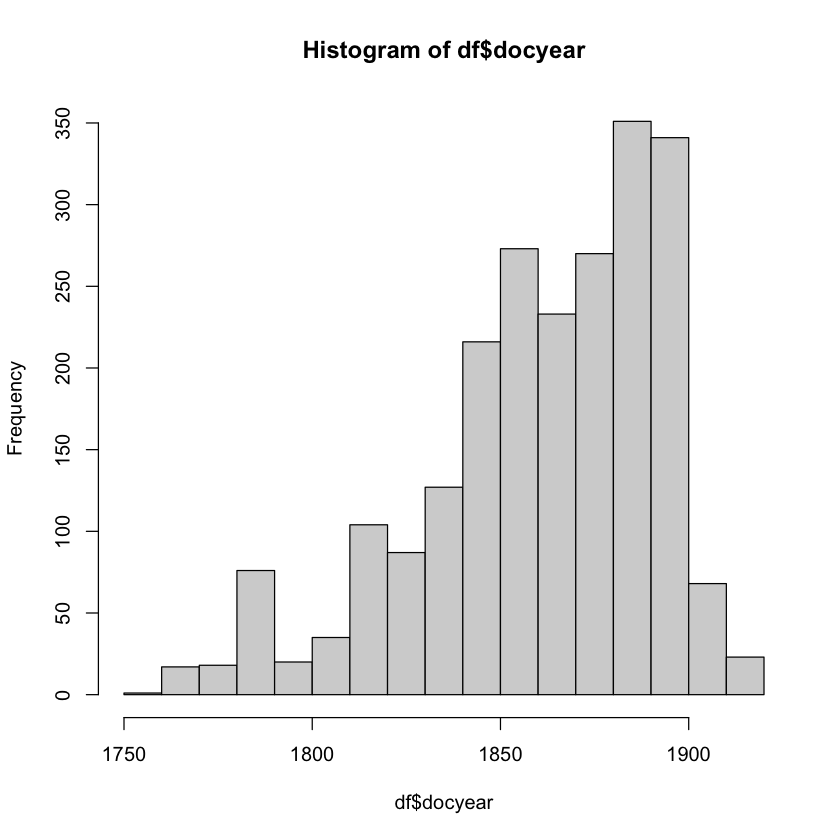

In [1187]:
hist(df$docyear)


 01  02  03  04  05  06  07  08  09  10  11  12 
278 163 188 157 168 200 170 164 174 169 202 227 

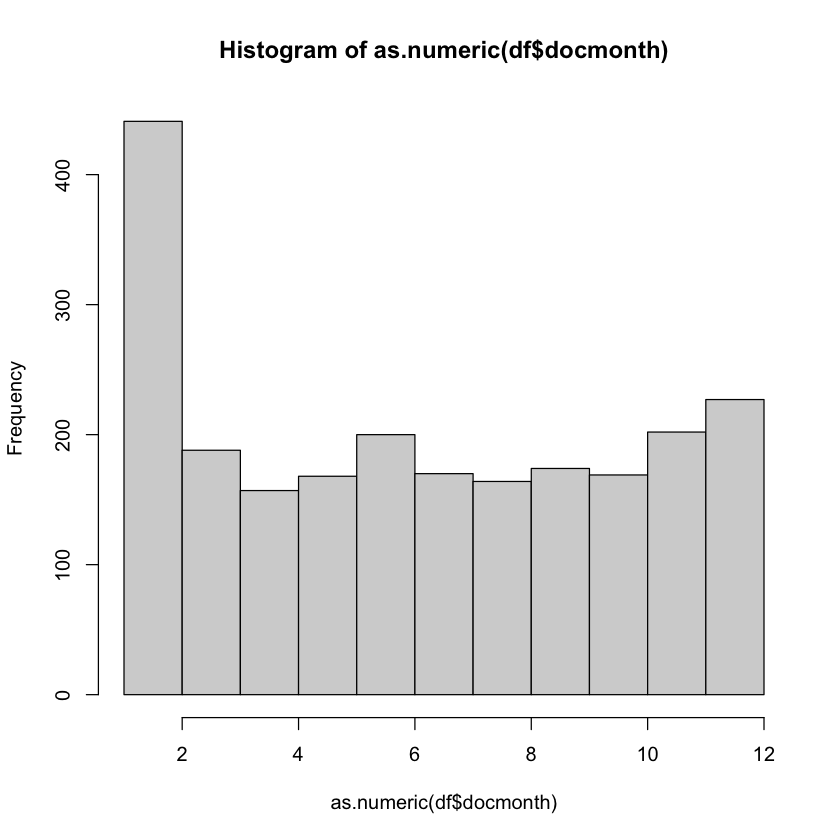

In [1190]:
table(df$docmonth)
hist(as.numeric(df$docmonth))

In [1179]:
#Save Sampling Frame

write.csv(df, 
          "20240528_PhD_IED.csv", 
          row.names=FALSE)